<a href="https://colab.research.google.com/github/ady909/-Taxi-trip-time-Prediction/blob/main/Taxi_trip_time_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Taxi Trip Time Prediction**

## Project Type - Regression

## Contribution - Individual

## **Project Summary**

More than 7 billion people exist on earth. With necessities of food, water and shelter there also a key requirement of commutating from one place to other. Rapid advancement in technology in the last two decades leads to adaption of a more efficient way of transportation via internet and app-based transport system. New York city is one of such advanced city with extensive use of transportation via subways, buses and taxi services. New York has more then 10,000 plus taxi and nearly 50% of population doesn’t have a personal vehicle. Due to this facts most people used taxi has a there primary mode of transport and it accounts for more than 100 millions taxi trips per year.

The main objective is to build a predictive model, which could help them in predicting the trip duration of taxi. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.

**The following steps were followed in the project:**

**Data Preprocessing and cleaning:** Done data preprocessing by converting some columns' datatypes , by adding some new columns and removimng outliers  

**Exploratory Data Analysis:**
Did Exploratory Analysis which includes Univariate as well as Bivariate Analysis.



**Data Split:** The preprocessed data was split into training and test sets on a random state of 0. By using training data we trained our predictive model and we used testing data to evaluate our prediction.

**Model Training:** The models were trained using the training data, and these models are optimized by some Hyperparameter settings.

**Model Evaluation:** The performance of the trained models was evaluated using metrics such as mean absolute error, root mean squared error, and R-squared. The model that performed the best on the test data was selected.


**Model Deployment:** The selected model was deployed in a live production setting, where it could make real-time predictions of bike demand. The model's performance was monitored over time to ensure its accuracy and usefulness.

**Models Used For modeling we tried various regression models such as**
1)Linear Regression

2)Random Forest

3)XG Boosting

All these models were fine tuned using a random search method with repeated cross-validation (CV) to ﬁnd the best hyperparameters. We also found out Feature importance so that we get to know about the features which are highly important.


**Github link:**

https://github.com/ady909/-Taxi-trip-time-Prediction/blob/128072d60553aa1ee147e3819584d24c04b2cdb9/Taxi_trip_time_Prediction_.ipynb

Our goal is to develop a predictive model that accurately estimates the duration of taxi trips in a metropolitan area. The model will take into account various factors such as pick-up and drop-off locations, time of day, day of the week, weather conditions, and traffic patterns.

The primary objectives and challenges include:

**Trip Duration Prediction:** Develop a model that can estimate the duration of a taxi trip with the highest possible accuracy.

**Real-Time Predictions:** Implement a system that provides real-time trip duration estimates for passengers and drivers, allowing for improved ride planning and experience.

**Feature Engineering:** Identify and extract relevant features from the dataset, such as geographical coordinates, time-related variables, and weather data.

**Data Preprocessing:** Clean and preprocess the data, including handling missing values, outliers, and ensuring data quality.

**Model Selection:** Explore different machine learning algorithms and techniques to identify the most suitable model for the task.

**Hyperparameter Tuning:** Optimize model hyperparameters to achieve the best performance.

**Cross-Validation:** Implement cross-validation strategies to ensure the model's ability to generalize to new data.

**Evaluation Metrics:** Define appropriate evaluation metrics to assess the model's accuracy, such as Mean Absolute Error (MAE) or Root Mean Square Error (RMSE).

**Scalability:** Ensure that the model can handle a high volume of prediction requests in real-time.

**Deployment:** Deploy the model in a production environment for use by taxi service providers, drivers, and passengers.

**Continuous Monitoring:** Establish a system for monitoring model performance and making necessary updates or retraining as data distribution or patterns change.

The successful development and deployment of this predictive model will lead to improved service quality, better resource allocation, and enhanced overall efficiency for both passengers and taxi service providers. It will also contribute to a more competitive and data-driven approach in the taxi and ride-sharing industry

## **Problem Description**

Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.



## **Business Objective:**

Optimizing trip duration prediction can help taxi companies better allocate resources, reduce wait times for passengers, and improve driver efficiency.
By analyzing historical trip duration data, taxi companies can forecast demand for their services during different times of the day, week, or year. This helps with resource planning.Understanding trip durations can inform dynamic pricing strategies, allowing taxi companies to adjust fares based on demand and route conditions. Trip duration analysis can be used to evaluate driver performance, identify areas for improvement, and incentivize efficient driving behavior.In collaboration with local authorities, taxi companies can use trip duration data to help manage and mitigate traffic congestion in urban areas.

To achieve all these things we have decided to analyse this data so that we can find proper solution for this.


##**Data Description**

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.


##**Data fields**

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in
 vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
trip_duration - duration of the trip in seconds

In [ ]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import datetime

In [ ]:
#some settings for visualizations
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
#Mounting the Drive inorder to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#creating dataframe
nyc_df = pd.read_csv("/content/drive/MyDrive/Datasets/NYC Taxi Data.csv")

##Lets take a look at dataset

In [ ]:
#lets look at first few elements
nyc_df.head(n =10)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
5  id0801584          2  2016-01-30 22:01:40  2016-01-30 22:09:03   
6  id1813257          1  2016-06-17 22:34:59  2016-06-17 22:40:40   
7  id1324603          2  2016-05-21 07:54:58  2016-05-21 08:20:49   
8  id1301050          1  2016-05-27 23:12:23  2016-05-27 23:16:38   
9  id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
5                6        -73.982857        40.742195         -73.992081   
6                4        -73.969017        40.757839         -73.957405   
7                1        -73.969276        40.797779         -73.922470   
8                1        -73.999481        40.738400         -73.985786   
9                1        -73.981049        40.744339         -73.973000   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435  
5         40.749184                  N            443  
6         40.765896                  N            341  
7         40.760559                  N           1551  
8         40.732815                  N            255  
9         40.789989                  N           1225

In [ ]:
#lets look at last few elements
nyc_df.tail(n = 10)

id  vendor_id      pickup_datetime     dropoff_datetime  \
1458634  id3445276          1  2016-04-03 13:51:25  2016-04-03 14:07:37   
1458635  id3027038          2  2016-05-19 14:46:55  2016-05-19 14:50:52   
1458636  id0405770          2  2016-02-12 10:13:06  2016-02-12 10:26:26   
1458637  id1920898          1  2016-04-17 18:48:16  2016-04-17 19:00:56   
1458638  id1454193          2  2016-02-02 00:39:39  2016-02-02 00:46:33   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458634                2        -73.989075        40.730465   
1458635                1        -73.985390        40.763020   
1458636                1        -73.863815        40.769684   
1458637                1        -73.975357        40.751705   
1458638                5        -73.988823        40.736553   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1458634         -73.963882         40.773739                  N            972  
1458635         -73.989708         40.767502                  N            237  
1458636         -73.864395         40.761326                  N            800  
1458637         -73.949478         40.776764                  N            760  
1458638         -73.989166         40.757393                  N            414  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198

In [ ]:
#lets check dimensions
nyc_df.shape

(1458644, 11)

Looks like a huge data with 1458644 data points , 10 features and one Target variable i.e. 'trip_duration'

In [ ]:
#basic summary
nyc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


4 columns are object datatype ,4 columns are float datatype and remaing 3 columns are integer datatype.



In [ ]:
#five point summary
nyc_df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

## Data Pre-processing

Converting the datatype of pickup date time and dropoff date time to datetime datatype

In [ ]:
#convertin to datetime datatype
nyc_df['pickup_datetime']= pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']= pd.to_datetime(nyc_df['dropoff_datetime'])

In [ ]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


### Extracting hour , day_name , day , month  and creating new features

In [ ]:
## Creating new features
#Extracting hour from pickup and dropoff datetime columns
nyc_df['pickup_hour']= nyc_df['pickup_datetime'].dt.hour
nyc_df['dropoff_hour']= nyc_df['dropoff_datetime'].dt.hour

#Extracting day from pickup and dropoff datetime columns
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()

#Extracting date from pickup and dropoff datetime columns
nyc_df['pickup_date']=pd.DatetimeIndex(nyc_df['pickup_datetime']).day
nyc_df['dropoff_date']=pd.DatetimeIndex(nyc_df['dropoff_datetime']).day

#Extracting month from pickup and dropoff datetime columns
nyc_df['pickup_month']= nyc_df['pickup_datetime'].dt.month
nyc_df['dropoff_month']=nyc_df['dropoff_datetime'].dt.month

#Extracting weekday from pickup and dropoff datetime columns
nyc_df['pickup_weekday']=nyc_df['pickup_datetime'].dt.weekday
nyc_df['dropoff_weekday']=nyc_df['dropoff_datetime'].dt.weekday

* pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.

* pickup_weekday and dropoff_weekday which will contain the day number instead of characters with Monday=0 and Sunday=6.

* pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.

* pickup_date and dropoff_date will provide the date of the trip.

* pickup_month and dropoff_month with month number with January=1 and December=12. Next, I have

###time_zone as a New feature is created



I have created a function that allows us to determine the time of day a ride was taken. This function categorizes the time into four zones: 'Morning' (from 6:00 am to 11:59 am), 'Afternoon' (from 12 noon to 3:59 pm), 'Evening' (from 4:00 pm to 9:59 pm), and 'Late Night' (from 10:00 pm to 5:59 am).

In [ ]:
#custom function for calculating new feature
def time_zone(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
nyc_df['pickup_timezone']= nyc_df['pickup_hour'].apply(time_zone)
nyc_df['dropoff_timezone']= nyc_df['dropoff_hour'].apply(time_zone)

### Lets create distance as a new feature



To calculate distances from geographical coordinates, we need to import a library designed for this purpose.

Importing the library which lets us calculate distance from geographical coordinates

In [ ]:
#importing library
from geopy.distance import great_circle

In [ ]:
#defining custom function to calculate distance
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):

 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)

 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
#creatng new feature
nyc_df['distance'] = nyc_df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


## trip direction feature is created



We've noticed that the direction of the trip, particularly for airport rides, can impact the trip duration. To account for this, we will calculate the bearing of each trip, indicating the general direction in which the taxi traveled from the pickup point to the dropoff point.

In this context, we use a convention where North corresponds to 0 degrees, East is 90 degrees, South is 180 degrees, and the full circle returns to North at 360 degrees.

In [ ]:
#importing math module
import math

#creating custom function for trip direction
def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)
    if brng < 0:
      brng = 360 + brng
      return brng
    else:
      return brng

In [ ]:
#creating feature
nyc_df['trip_direction'] = nyc_df.apply(lambda x: get_bearing(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],
                       x['dropoff_longitude']), axis = 1)

###trip_speed as a new feature

In [ ]:
#creating new features
nyc_df['time_diff_minutes']= nyc_df['dropoff_datetime']- nyc_df['pickup_datetime']
nyc_df['time_diff_minutes']= nyc_df['time_diff_minutes']/np.timedelta64(1,'m')

In [ ]:
#The trip_speed unit will be mph
def speed(x,y):
  z = (x*0.621)/(y*0.016667)
  return z

In [ ]:
#creating feature
nyc_df['trip_speed']= nyc_df.apply(lambda x: speed(x['distance'],x['time_diff_minutes']),axis=1)

Lets first check our data now

In [ ]:
nyc_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  ...  pickup_month  dropoff_month  \
0         40.765602                  N  ...             3              3   
1         40.731152                  N  ...             6              6   
2         40.710087                  N  ...             1              1   
3         40.706718                  N  ...             4              4   
4         40.782520                  N  ...             3              3   

   pickup_weekday dropoff_weekday pickup_timezone  dropoff_timezone  distance  \
0               0               0         Evening           Evening  1.498523   
1               6               6      Late night        Late night  1.805510   
2               1               1         Morning         Afternoon  6.385108   
3               2               2         Evening           Evening  1.485501   
4               5               5       Afternoon         Afternoon  1.188590   

   trip_direction  time_diff_minutes  trip_speed  
0       99.970196           7.583333    7.362705  
1      242.846232          11.050000    6.087959  
2      200.319835          35.400000    6.720462  
3      187.262300           7.150000    7.741069  
4      179.473585           7.250000    6.108411  

[5 rows x 27 columns]

In [ ]:
nyc_df.shape

(1458644, 27)

After feature creation we have total 26 features and 1 target variable

## Data Cleaning

Check wheather null values are present or not

In [ ]:
#Checking Missing Values
nyc_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
dropoff_hour          0
pickup_day            0
dropoff_day           0
pickup_date           0
dropoff_date          0
pickup_month          0
dropoff_month         0
pickup_weekday        0
dropoff_weekday       0
pickup_timezone       0
dropoff_timezone      0
distance              0
trip_direction        0
time_diff_minutes     0
trip_speed            0
dtype: int64

There are no null / nan values in data

lets check duplicates

In [ ]:
#Checking Duplicated Rows
nyc_df.duplicated().sum()

0

## **So there are no null and duplicate values in our data.**

### **Handling Outliers**

We will be filtering the dataset to focus on data records within the 1% to 99.8% range for several key criteria:

* For pickup latitudes and longitudes, we will keep records where the values are within the range defined by the 1st percentile value and the 99.8th percentile value.

* For trip duration, we will retain records where the trip duration falls between the 1st percentile value and the 99.8th percentile value.

* Similarly, we will ensure that the distance between the pickup and dropoff points is within the range of its 1st percentile value and the 99.8th percentile value.

* We will also filter based on trip speed, keeping records where the speed falls between its 1st percentile value and the 99.8th percentile value.

* In essence, we are removing outliers by excluding records that fall outside the specified range for each of these criteria, which helps us work with a more consistent and meaningful dataset.

lets remove outliers from pickup_latitude

In [ ]:
# Define the desired percentiles for speed
percentile_speed = [1, 25, 50, 75, 95, 99, 99.8]

# Print the total number of trips in the dataset
print("Total number of trips = {:,}".format(len(nyc_df)))

# Loop through the specified percentiles and print the corresponding values
for i in percentile_speed:
    # Print the percentile value and the corresponding latitude value
    print("{}% of the latitude were below {:.2f} degree".format(i, np.percentile(nyc_df.pickup_latitude, i)))


Total number of trips = 1,458,644
1% of the latitude were below 40.64 degree
25% of the latitude were below 40.74 degree
50% of the latitude were below 40.75 degree
75% of the latitude were below 40.77 degree
95% of the latitude were below 40.79 degree
99% of the latitude were below 40.81 degree
99.8% of the latitude were below 40.83 degree


In [ ]:
# Filtering the dataset based on latitude percentiles
# We are retaining records within the 1% to 99.8% range of pickup latitude values

# Filter out records where pickup latitude is above the 99.8th percentile value
nyc_df = nyc_df[nyc_df['pickup_latitude'] <= np.percentile(nyc_df.pickup_latitude, 99.8)]

# Further filter out records where pickup latitude is below the 1st percentile value
nyc_df = nyc_df[nyc_df['pickup_latitude'] >= np.percentile(nyc_df.pickup_latitude, 1)]


lets remove outliers from pickup_longitude

In [ ]:
# Define the desired percentiles for longitude
percentile_speed = [1, 25, 50, 75, 95, 99, 99.8]

# Print the total number of trips in the dataset
print("Total number of trips = {:,}".format(len(nyc_df)))

# Loop through the specified percentiles and print the corresponding values for longitude
for i in percentile_speed:
    # Print the percentile value and the corresponding longitude value
    print("{}% of the longitude were below {:.2f} degrees".format(i, np.percentile(nyc_df.pickup_longitude, i)))


Total number of trips = 1,441,261
1% of the longitude were below -74.01 degrees
25% of the longitude were below -73.99 degrees
50% of the longitude were below -73.98 degrees
75% of the longitude were below -73.97 degrees
95% of the longitude were below -73.94 degrees
99% of the longitude were below -73.79 degrees
99.8% of the longitude were below -73.78 degrees


In [ ]:
# Filtering the dataset based on longitude percentiles
# We are retaining records within the 1% to 99.8% range of pickup longitude values

# Filter out records where pickup longitude is above the 99.8th percentile value
nyc_df = nyc_df[nyc_df['pickup_longitude'] <= np.percentile(nyc_df.pickup_longitude, 99.8)]

# Further filter out records where pickup longitude is below the 1st percentile value
nyc_df = nyc_df[nyc_df['pickup_longitude'] >= np.percentile(nyc_df.pickup_longitude, 1)]


lets remove Outliers from trip_duration

In [ ]:
# Define the desired percentiles for trip duration
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]

# Print the total number of trips in the dataset
print("Total number of trips = {:,}".format(len(nyc_df)))

# Loop through the specified percentiles and print the corresponding values for trip duration
for i in percentile_trip_duration:
    # Print the percentile value and the corresponding trip duration in seconds
    print("{}% of the trips were below {:.2f} seconds".format(i, np.percentile(nyc_df.trip_duration, i)))


Total number of trips = 1,424,181
1% of the trips were below 90.00 seconds
25% of the trips were below 394.00 seconds
50% of the trips were below 655.00 seconds
75% of the trips were below 1056.00 seconds
95% of the trips were below 2018.00 seconds
99% of the trips were below 3264.00 seconds
99.8% of the trips were below 5358.00 seconds


In [ ]:
# Filtering the dataset based on trip duration percentiles
# We are retaining records within the 1% to 99.8% range of trip duration values

# Filter out records where trip duration is above the 99.8th percentile value
nyc_df = nyc_df[nyc_df['trip_duration'] <= np.percentile(nyc_df.trip_duration, 99.8)]

# Further filter out records where trip duration is below the 1st percentile value
nyc_df = nyc_df[nyc_df['trip_duration'] >= np.percentile(nyc_df.trip_duration, 1)]


Lets remove Outliers from trip_speed

In [ ]:
# Define the desired percentiles for trip speed
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]

# Print the total number of trips in the dataset
print("Total number of trips = {:,}".format(len(nyc_df)))

# Loop through the specified percentiles and print the corresponding values for trip speed
for i in percentile_trip_duration:
    # Print the percentile value and the corresponding trip speed in miles per hour (mph)
    print("{}% of the speed were below {:.2f} mph".format(i, np.percentile(nyc_df.trip_speed, i)))


Total number of trips = 1,407,301
1% of the speed were below 1.64 mph
25% of the speed were below 5.66 mph
50% of the speed were below 7.89 mph
75% of the speed were below 10.92 mph
95% of the speed were below 17.74 mph
99% of the speed were below 24.61 mph
99.8% of the speed were below 30.19 mph


In [ ]:
# Filtering the dataset based on trip speed percentiles
# We are retaining records within the 1% to 99.8% range of trip speed values

# Filter out records where trip speed is above the 99.8th percentile value
nyc_df = nyc_df[nyc_df['trip_speed'] <= np.percentile(nyc_df.trip_speed, 99.8)]

# Further filter out records where trip speed is below the 1st percentile value
nyc_df = nyc_df[nyc_df['trip_speed'] >= np.percentile(nyc_df.trip_speed, 1)]


Lets remove  Outliers from distance

In [ ]:
# Define the desired percentiles for trip distance
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]

# Print the total number of trips in the dataset
print("Total number of trips = {:,}".format(len(nyc_df)))

# Loop through the specified percentiles and print the corresponding values for trip distance
for i in percentile_trip_duration:
    # Print the percentile value and the corresponding trip distance in kilometers (km)
    print("{}% of the distance were below {:.2f} km".format(i, np.percentile(nyc_df.distance, i)))



Total number of trips = 1,390,441
1% of the distance were below 0.42 km
25% of the distance were below 1.26 km
50% of the distance were below 2.10 km
75% of the distance were below 3.79 km
95% of the distance were below 10.07 km
99% of the distance were below 20.17 km
99.8% of the distance were below 22.10 km


In [ ]:
# Filtering the dataset based on trip distance percentiles
# We are retaining records within the 1% to 99.8% range of trip distance values

# Filter out records where trip distance is above the 99.8th percentile value
nyc_df = nyc_df[nyc_df['distance'] <= np.percentile(nyc_df.distance, 99.8)]

# Further filter out records where trip distance is below the 1st percentile value
nyc_df = nyc_df[nyc_df['distance'] >= np.percentile(nyc_df.distance, 1)]


Now lets check dimensions


In [ ]:
#check the dimensions of data
nyc_df.shape

(1373783, 27)

Initially, we started with a dataset containing 1,458,644 records. After the data cleaning process, which involved removing outliers and adding a few additional features, we now have a refined dataset with 1,373,783 records. During this data cleaning phase, approximately 84,861 records that were irrelevant to our specific problem statement were filtered out. With the data now in a more focused and relevant state, we are ready to proceed with our exploratory data analysis.

##**Exploratory Data Analysis**

## Univariate Analysis

## **Passenger Count**

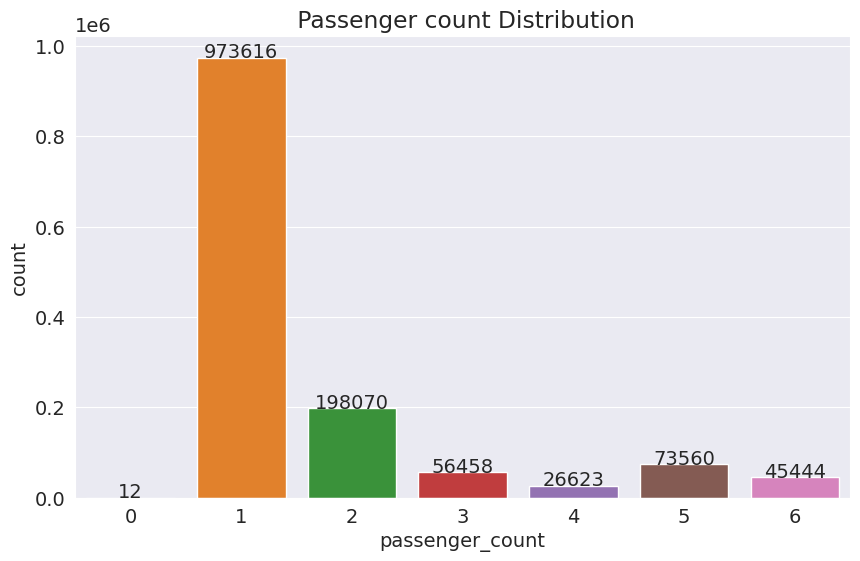

In [ ]:
# Create a countplot to visualize the distribution of passenger counts
ax = sns.countplot(x=nyc_df['passenger_count'])
plt.title(' Passenger count Distribution')

# Add labels with the count above each bar in the countplot
for a in ax.patches:
    height = a.get_height()
    ax.text(x=a.get_x() + (a.get_width() / 2),
            y=height + 0.2, ha='center', s='{:.0f}'.format(height))

# Display the countplot
plt.show()


0, 7, or 9, as those values might be outliers or erroneous data. Additionally, it filters the dataset to keep records with passenger counts up to 6, which is a more reasonable range for most taxi trips.

In [ ]:
# Remove rows where passenger count is equal to 0, 7, or 9
nyc_df = nyc_df[nyc_df['passenger_count'] != 0]

# Further filter the dataset to retain records where passenger count is less than or equal to 6
nyc_df = nyc_df[nyc_df['passenger_count'] <= 6]


**Observation :**
* Mostly Passenger count of taxi is one.
* Solo explorers use taxi for their trip perticular in New York.


## **pickup/dropoff day**

Text(0.5, 1.0, 'Number of dropoffs done per day of the week')

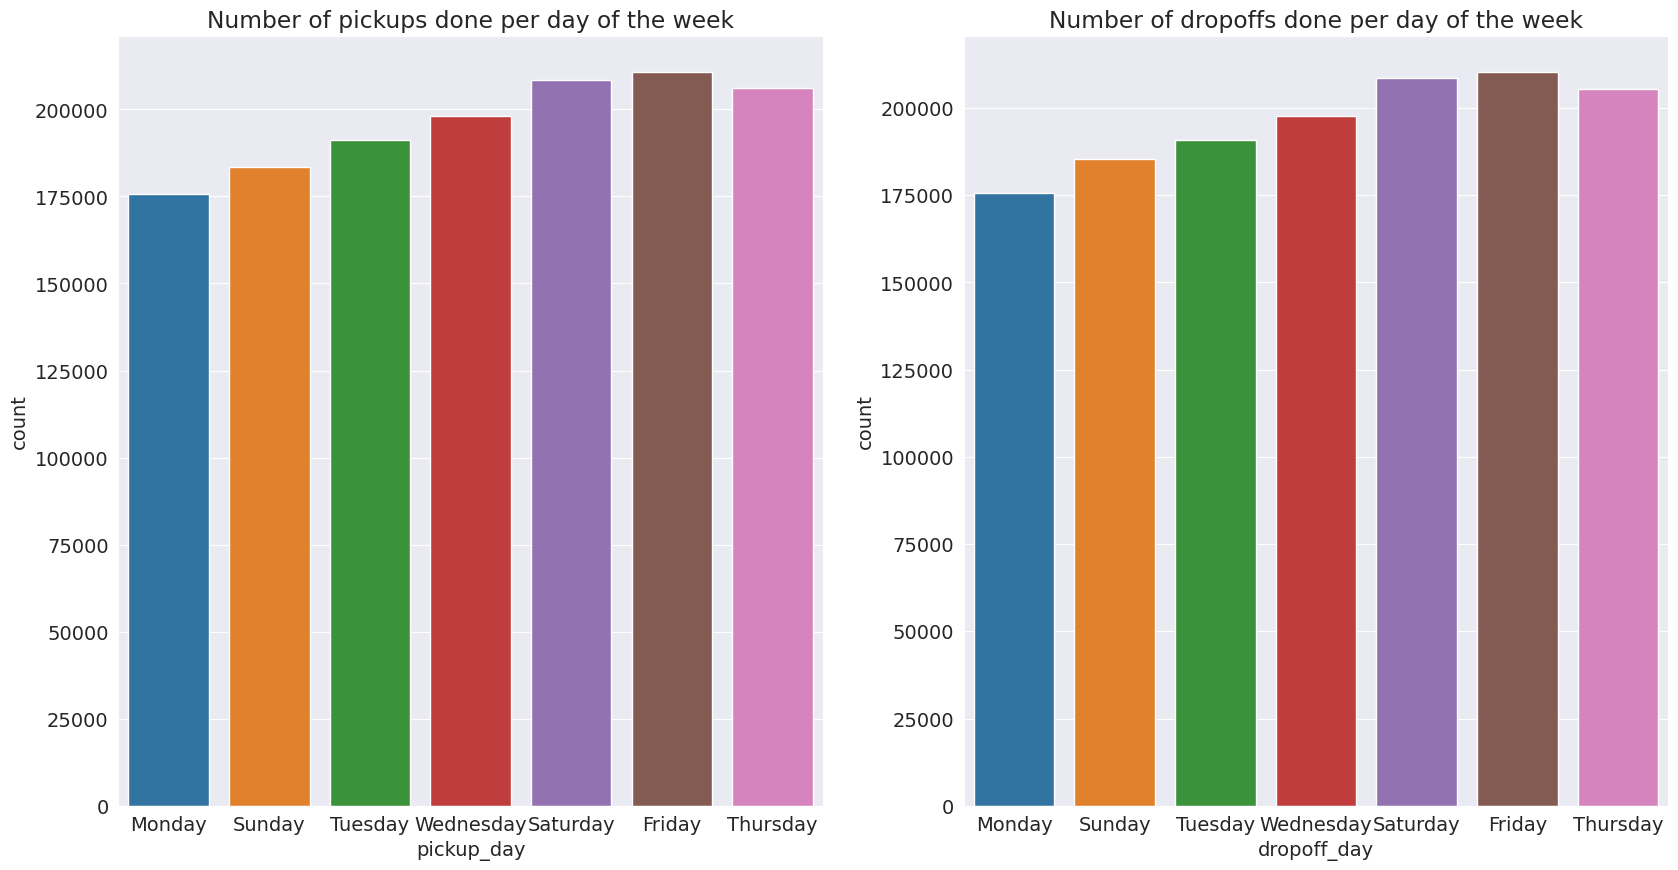

In [ ]:
# Create a figure with two subplots, side by side
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create the first subplot: Number of pickups done on each day of the week
sns.countplot(x='pickup_day', data=nyc_df, ax=ax[0])
ax[0].set_title('Number of pickups done per day of the week')

# Create the second subplot: Number of dropoffs done on each day of the week
sns.countplot(x='dropoff_day', data=nyc_df, ax=ax[1])
ax[1].set_title('Number of dropoffs done per day of the week')


**Observation**:
* Demand of taxi is the highest on Fridays and is the lowest on Monday.
* People mostly use Taxi on Friday to to go somewhere and enjoy their weekends.
* Its comapratively low on sunday as people might be taking sunday as a rest day or else Traffic on sunday must be really high due to off day.

## **Pickup Timezone**

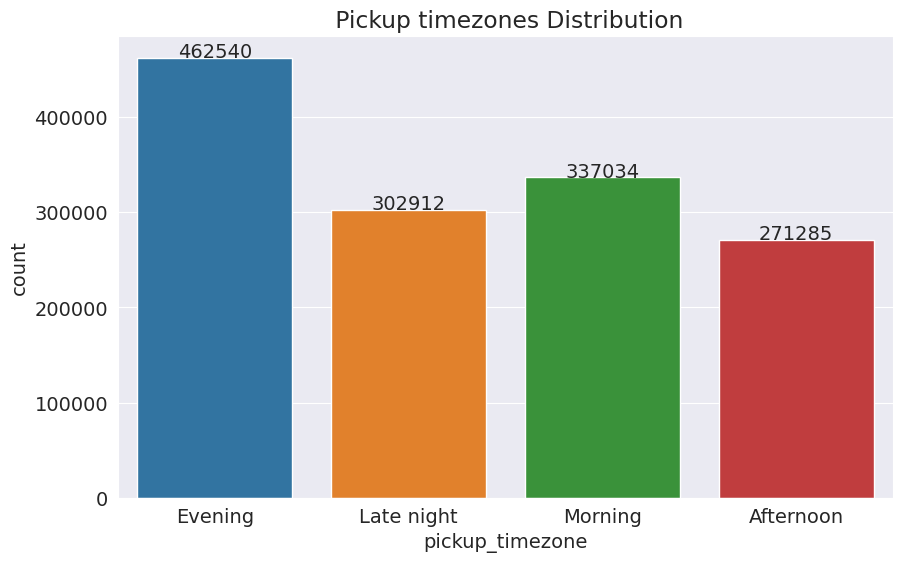

In [ ]:
# Create a countplot to visualize the distribution of pickup timezones
ax = sns.countplot(x=nyc_df['pickup_timezone'])
plt.title(' Pickup timezones Distribution')

# Add labels with the count above each bar in the countplot
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width() / 2),
            y=height + 0.2, ha='center', s='{:.0f}'.format(height))



# Display the countplot
plt.show()


**Observation:**
* Mostly people travel with taxi in the evening because they are mostly tired of their work and long distance office traveling. Also their can be safety issue as well because taxies are safer than any other vehicle.

* People travel least during afternoon because of their busy schedule may be.

## **pickup_hour and drop off hour**

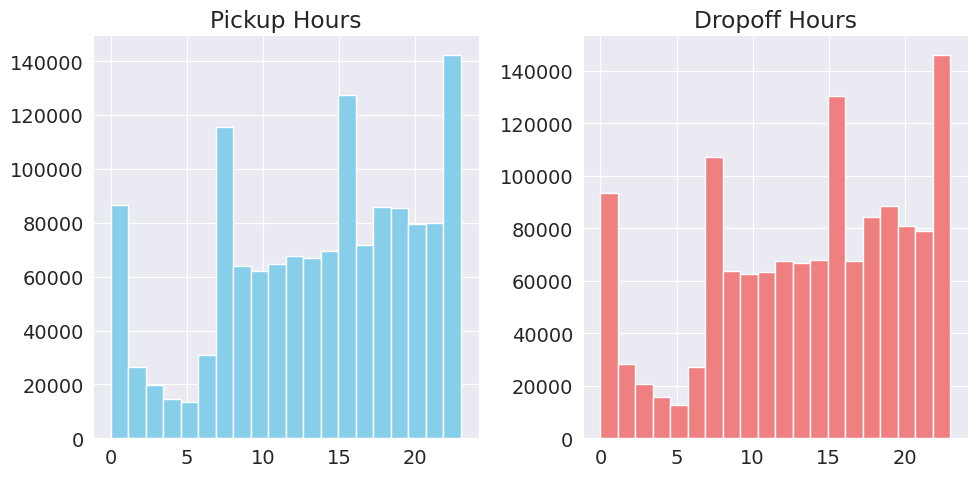

In [ ]:
# Create a figure with two subplots, side by side
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create a histogram for pickup hours in the first subplot
nyc_df.pickup_hour.hist(bins=20, ax=ax[0] , color='skyblue')
ax[0].set_title('Pickup Hours')

# Create a histogram for dropoff hours in the second subplot
nyc_df.dropoff_hour.hist(bins=20, ax=ax[1] , color='lightcoral')
ax[1].set_title('Dropoff Hours')

# Adjust the layout for a more organized presentation
plt.tight_layout()


In [ ]:
# Replace 0 hours with 24 hours in the 'pickup_hour' column
nyc_df['pickup_hour'].replace(to_replace=0, value=24, inplace=True)


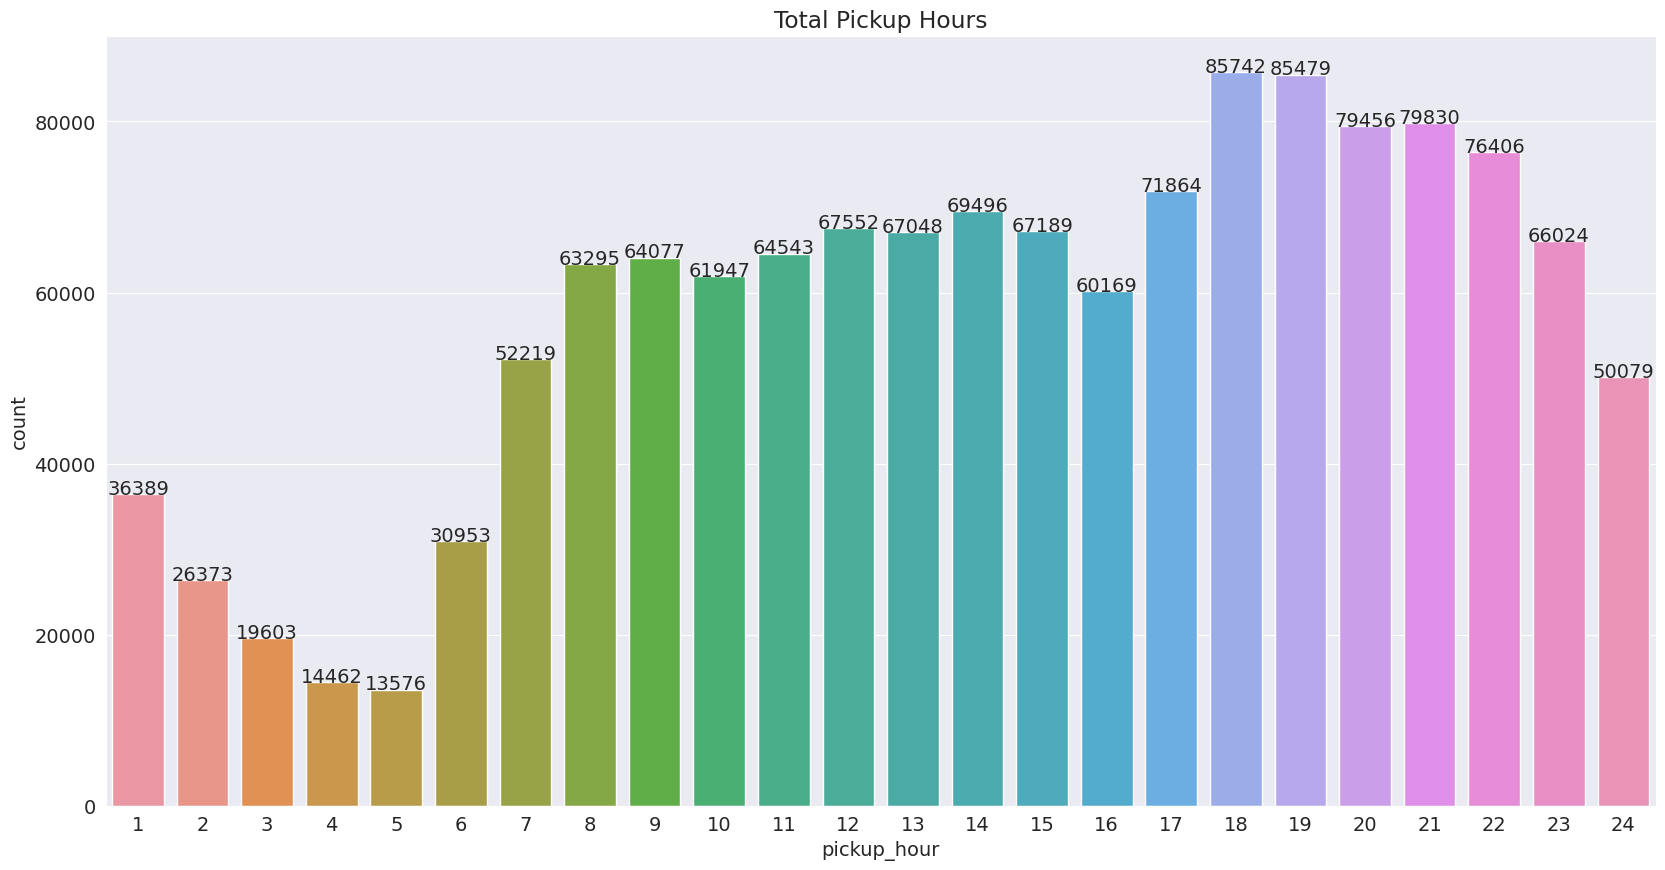

In [ ]:
# Create a figure with a specific size for the plot
plt.figure(figsize=(20, 10))

# Create a countplot to visualize the distribution of pickup hours
ax = sns.countplot(x=nyc_df['pickup_hour'])
plt.title('Total Pickup Hours')

# Add labels with the count above each bar in the countplot
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width() / 2),
            y=height + 0.2, ha='center', s='{:.0f}'.format(height))

# Display the countplot
plt.show()


**Observation:**
*  The busiest hours for taxi trips were observed during the evening, specifically between 6:00 pm to 7:00 pm. This pattern aligns with the time when people typically return from their offices, contributing to increased demand for taxi services.

*  Conversely, the least busy hours for taxi trips were in the early morning, typically between 2:00 am to 5:00 am. During these hours, the demand for taxi services tends to be lower, likely due to reduced travel activity and fewer commuters needing transportation.

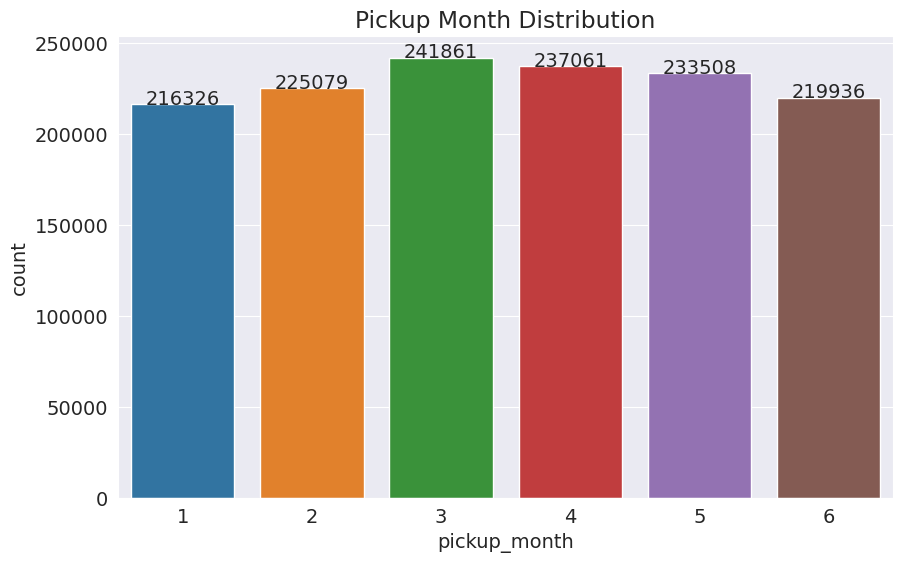

In [ ]:
# Create a countplot to visualize the distribution of pickup months
ax = sns.countplot(x=nyc_df['pickup_month'])
plt.title('Pickup Month Distribution')

# Add labels with the count above each bar in the countplot
for p in ax.patches:
    height = p.get_height()  # Fix the syntax error here (change "get height" to "get_height")
    ax.text(x=p.get_x() + (p.get_width() / 2),
            y=height + 0.2, ha='center', s='{:.0f}'.format(height))

# Display the countplot
plt.show()


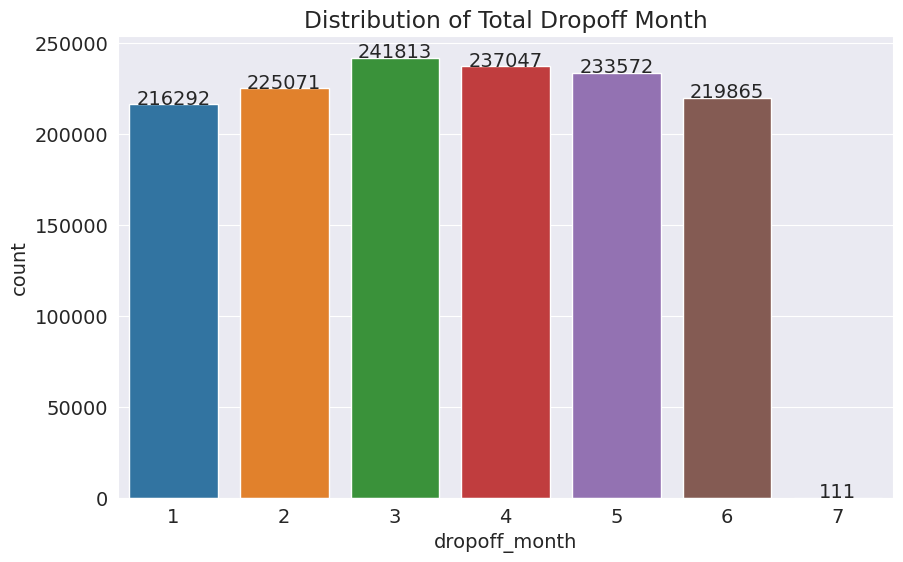

In [ ]:
# Create a countplot to visualize the distribution of dropoff months
ax = sns.countplot(x=nyc_df['dropoff_month'])
plt.title('Distribution of Total Dropoff Month')

# Add labels with the count above each bar in the countplot
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width() / 2),
            y=height + 0.2, ha='center', s='{:.0f}'.format(height))

# Display the countplot
plt.show()


**Observation**

1.The month of March has received the highest number of trips followed by April for both pickup/dropoff.

2.The least number of trips done in the month of January and July.

## **Bivariate Data Analysis**

Passenger Count vs Vendor id

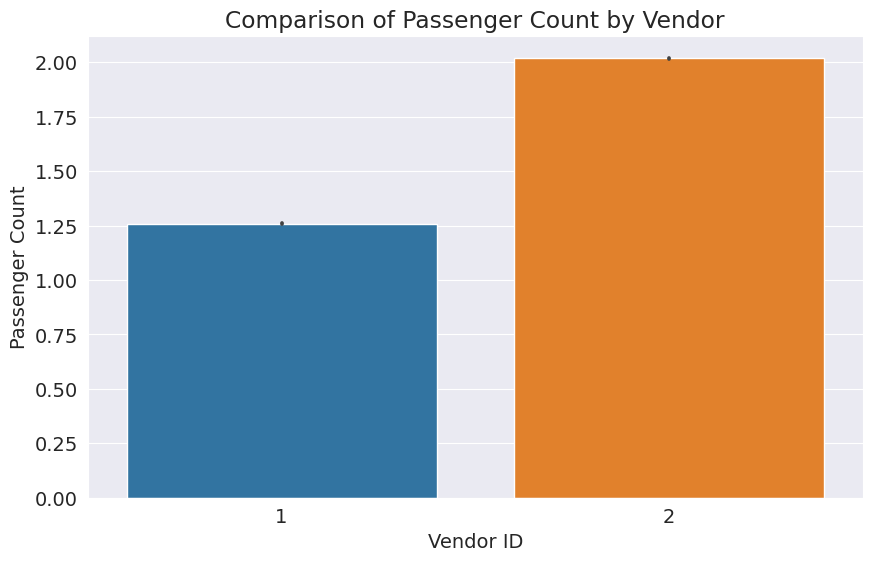

In [ ]:
# Create a barplot to compare passenger count between different vendor IDs
sns.barplot(x='vendor_id', y='passenger_count', data=nyc_df)
plt.title('Comparison of Passenger Count by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Passenger Count')
plt.show()


The countplot reveals that vendor 2 typically accommodates an average of 2 passengers per ride, while vendor 1 tends to provide rides with an average of 1 passenger on board.

**Trip Duration per time zone**

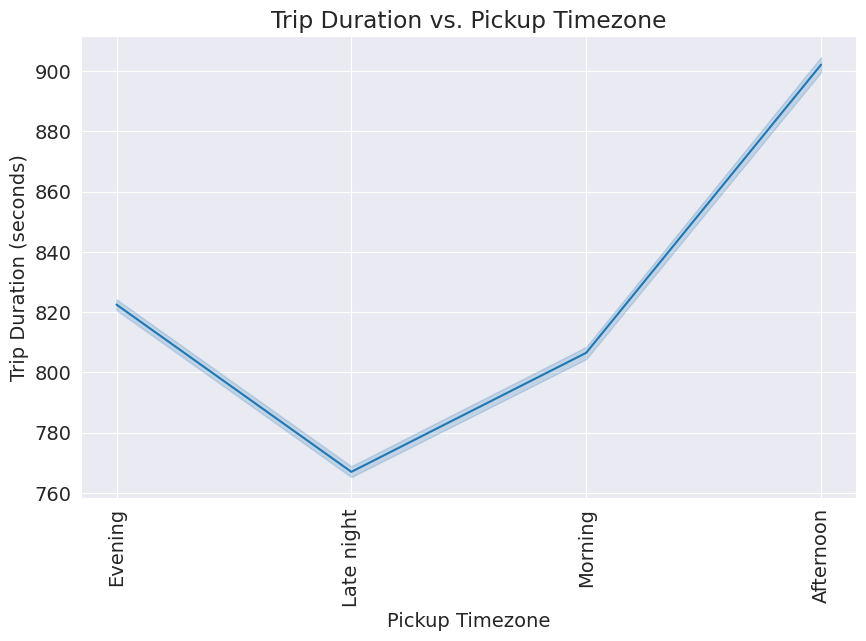

In [ ]:
# Create a lineplot to visualize the relationship between pickup timezone and trip duration
sns.lineplot(x='pickup_timezone', y='trip_duration', data=nyc_df)
plt.title('Trip Duration vs. Pickup Timezone')
plt.xlabel('Pickup Timezone')
plt.ylabel('Trip Duration (seconds)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()


The lineplot indicates that trip duration tends to peak during the afternoon hours and reaches its lowest point during the late night and early morning hours. This suggests that, on average, taxi trips have the longest durations in the afternoon and are shortest during the late night to early morning period.

## **Trip Duration per different days**

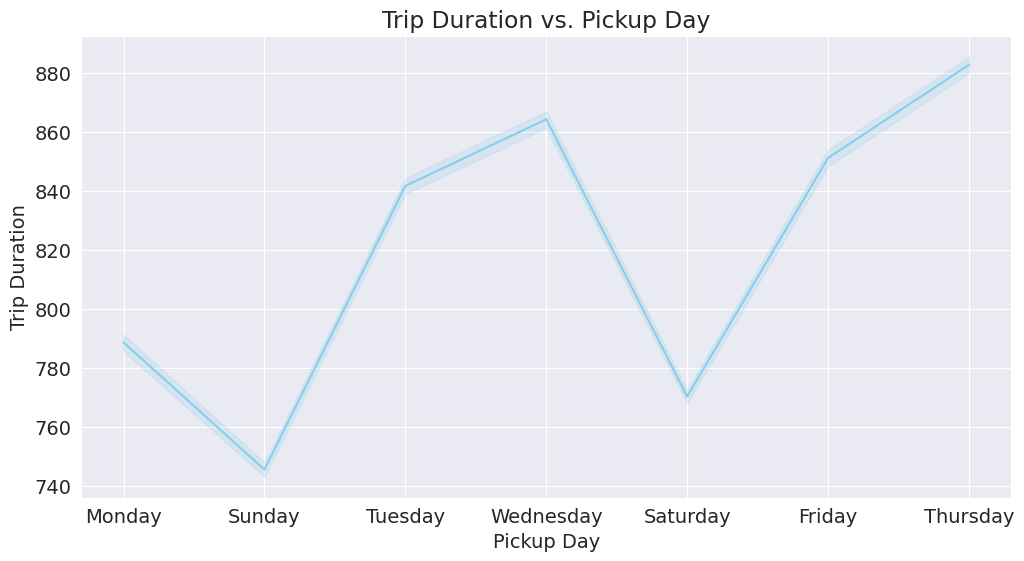

In [ ]:
# Create a line plot to visualize trip duration across different pickup days
plt.figure(figsize=(12, 6))  # Set the figure size

# Use Seaborn's lineplot to plot 'pickup_day' on the x-axis and 'trip_duration' on the y-axis
sns.lineplot(x='pickup_day', y='trip_duration', data=nyc_df, color='skyblue')

# Customize the plot labels and title
plt.title('Trip Duration vs. Pickup Day')
plt.xlabel('Pickup Day')
plt.ylabel('Trip Duration')

# Show the plot
plt.show()

The line plot reveals that trip duration tends to be at its maximum on Wednesdays and is generally the lowest on Sundays. This observation suggests that, on average, taxi trips experience their longest durations in the middle of the week, particularly on Wednesdays, and their shortest durations on Sundays.

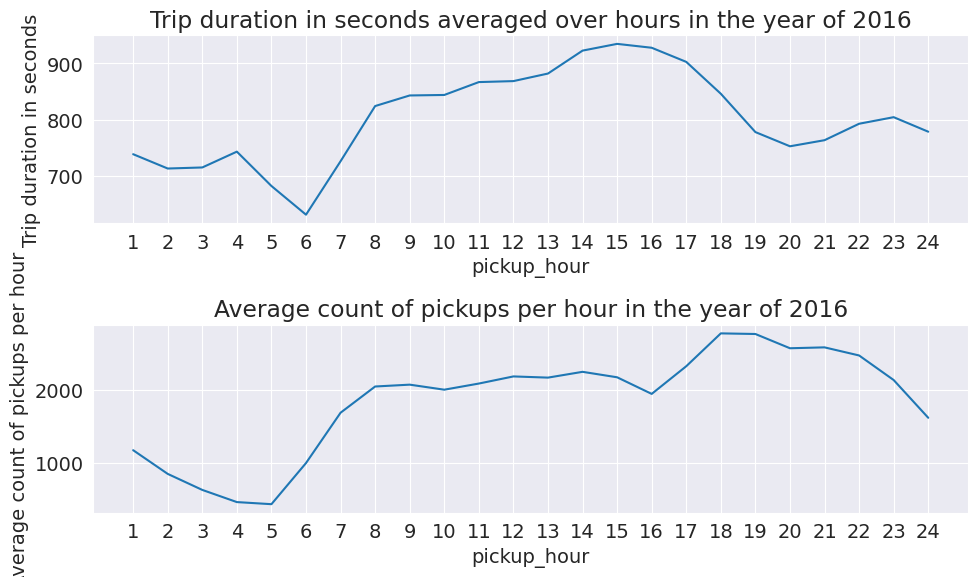

In [ ]:
#Plotting average trip duration for each hour over the entire year
ax1 = plt.subplot(211)
nyc_df.groupby(nyc_df.pickup_hour)['trip_duration'].mean().plot(ax = ax1, figsize=(10,6))
plt.ylabel('Trip duration in seconds')
plt.xticks(nyc_df.pickup_hour.unique())
plt.title('Trip duration in seconds averaged over hours in the year of 2016')

# Plotting the average number of rides per hour
ax2 = plt.subplot(212)
nyc_df.groupby(['pickup_date', 'pickup_hour']).count()['vendor_id'].groupby('pickup_hour').mean().plot(ax = ax2, figsize=(10,6))
plt.ylabel('Average count of pickups per hour')
plt.xticks(nyc_df.pickup_hour.unique())
plt.title('Average count of pickups per hour in the year of 2016')
plt.tight_layout()

As one might anticipate, both the trip duration and the number of rides exhibit an increase during the evening hours. This is a natural pattern, as the rising number of rides in a particular area tends to contribute to increased traffic, subsequently leading to longer trip durations.

In the second plot, we observe a steady rise in the number of pickups from 5 am to 8 am, followed by a period of relative stability between 8 am and 4 pm. Then, we witness another notable increase in pickups from 4 pm to 6 pm, followed by a subsequent decline.

During the evening hours, the average trip duration hovers around 15 minutes, highlighting a common trend in relatively shorter and more efficient trips during this time frame..

## **Heatmap**

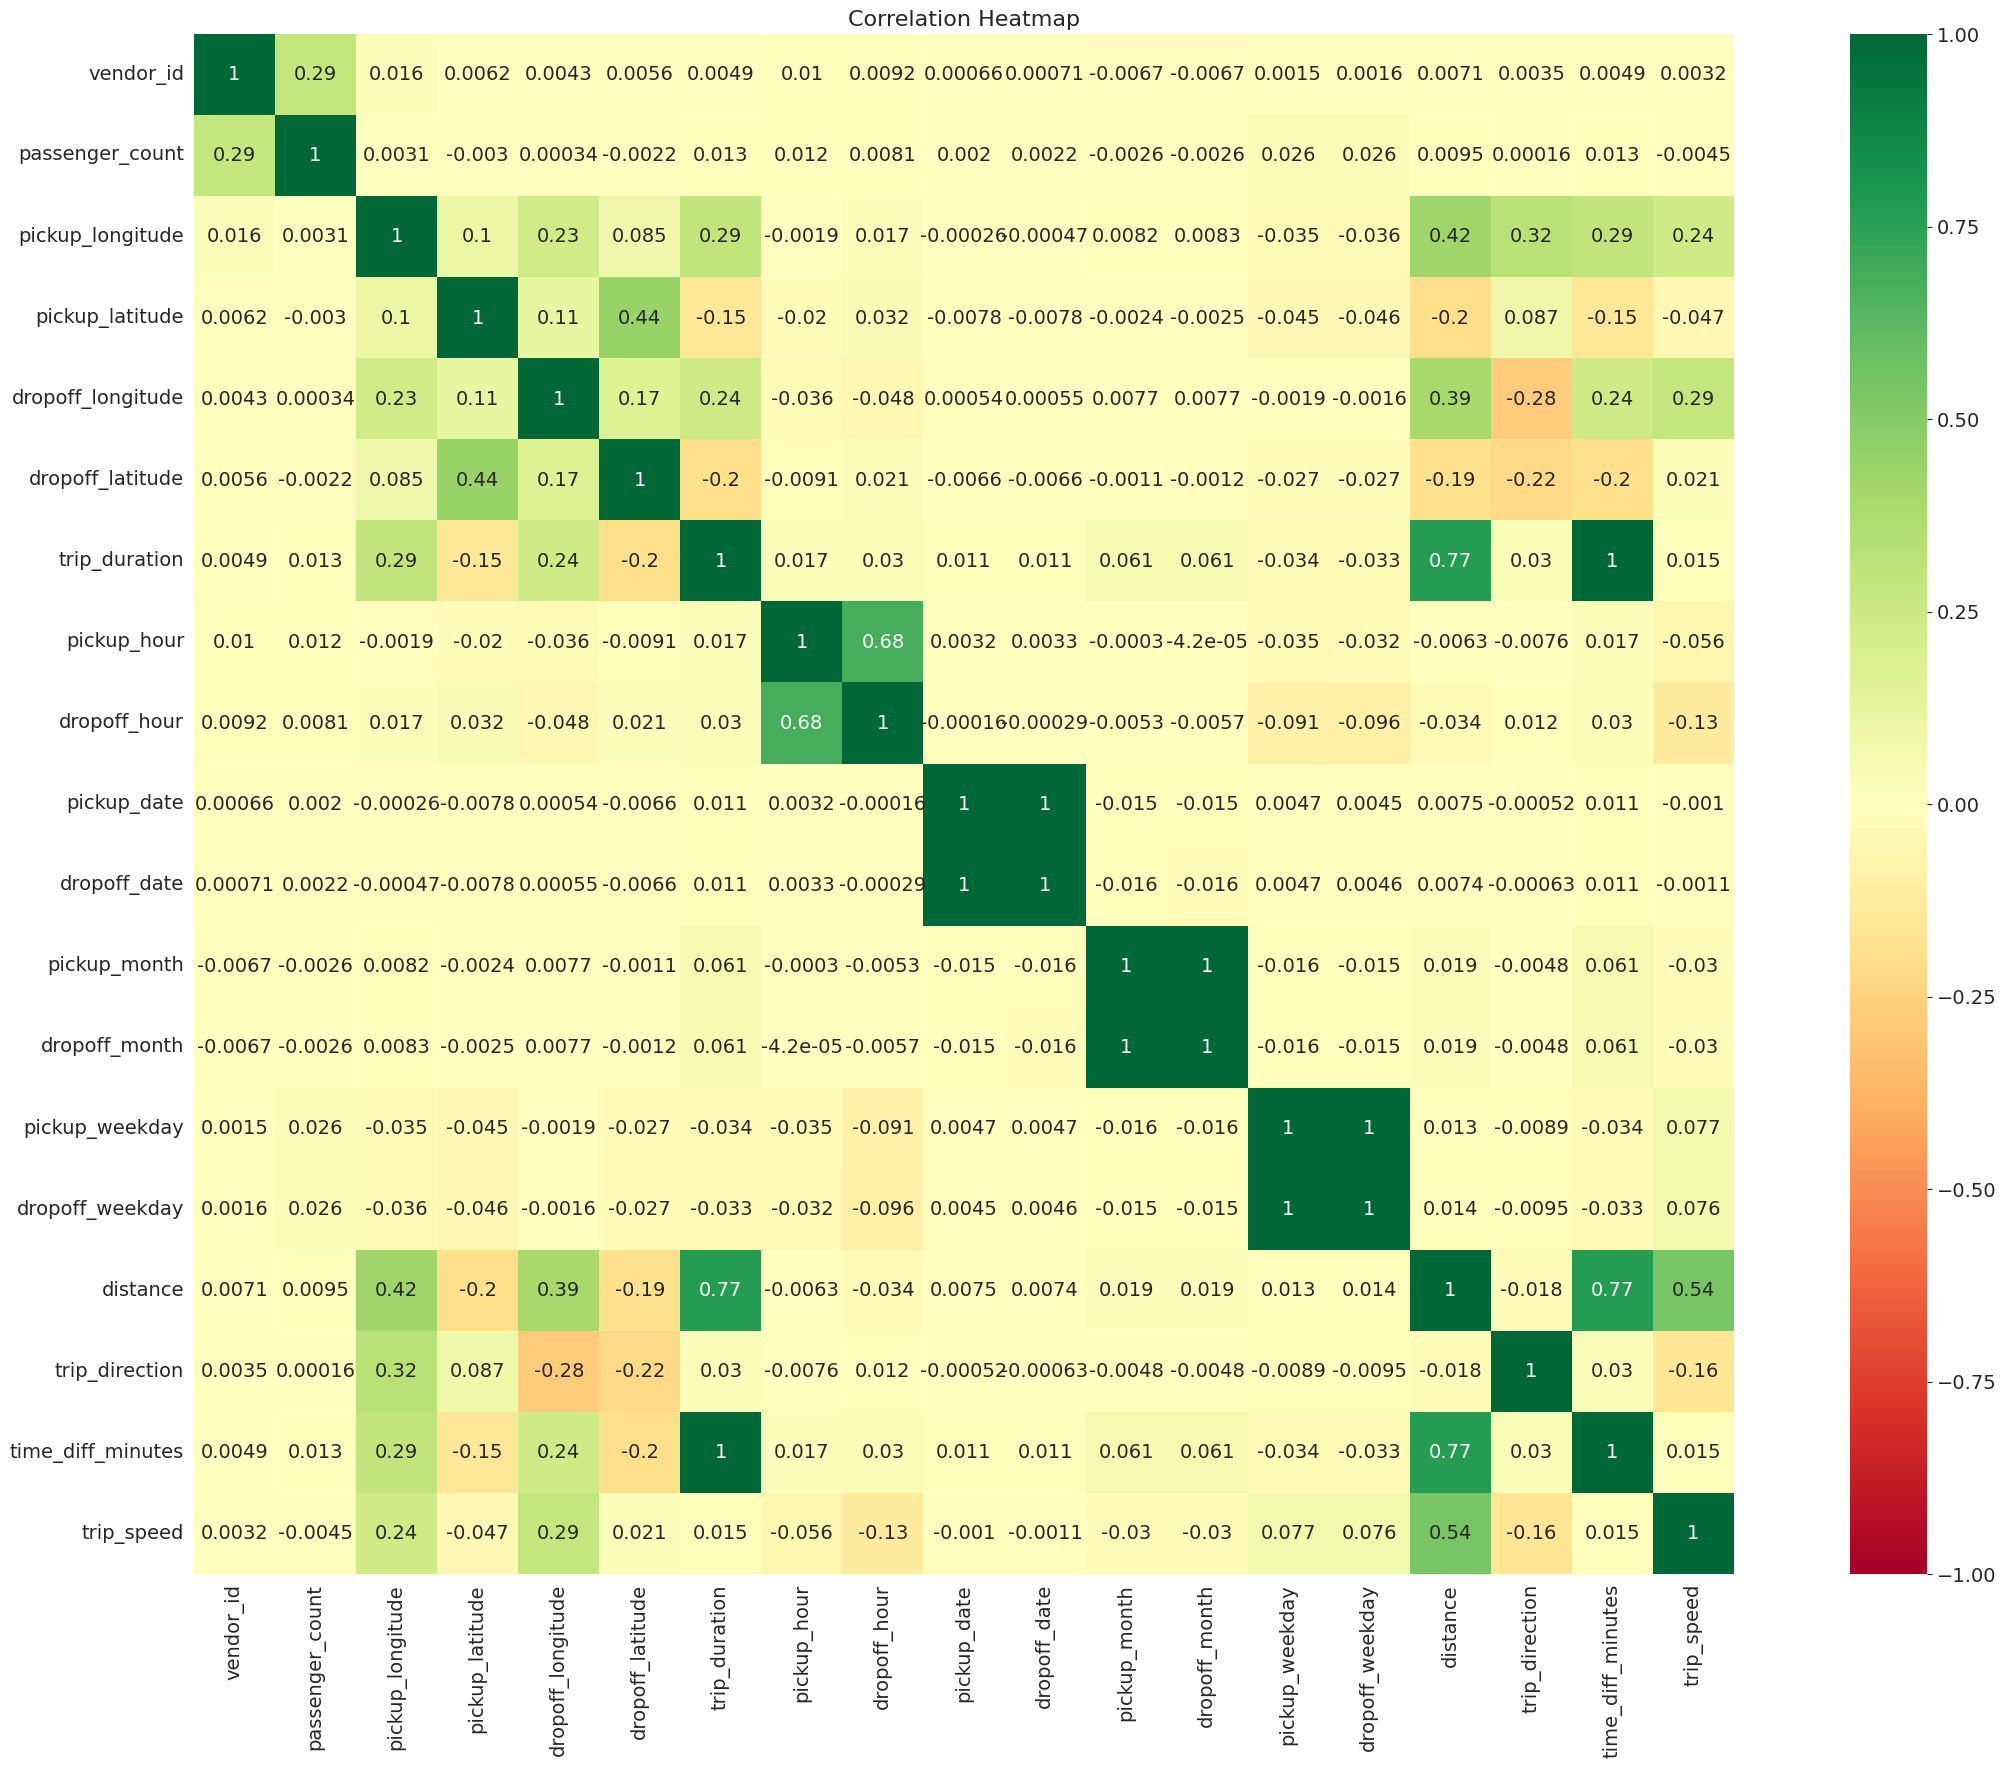

In [ ]:
# Set the figure size for the heatmap
plt.figure(figsize=(30, 20))

# Create a correlation heatmap for the DataFrame
sns.heatmap(nyc_df.corr(), cmap='RdYlGn', annot=True, vmin=-1, vmax=1, square=True)

# Set the title for the heatmap
plt.title("Correlation Heatmap", fontsize=16)

# Display the heatmap
plt.show()


* Observing the correlation heatmap, it becomes evident that certain variables exhibit strong correlations with their counterparts. For instance, there is a notable correlation between pickup_month and dropoff_month, pickup_date and dropoff_date, and pickup_weekday and dropoff_weekday.

* Furthermore, our target variable, trip_duration, displays a substantial correlation of 0.77% with the distance variable. Additionally, the pickup_hour and dropoff_hour exhibit a significant correlation of 0.68.

* To mitigate multicollinearity, a practical strategy is to retain the pickup details while discarding the dropoff details for variables displaying high correlations. This approach simplifies the model and reduces redundancy while maintaining the most informative features.

* In this context, it is a good practice to drop the time_diff_minutes variable, as it is highly correlated with trip_duration. This streamlined dataset with reduced multicollinearity can enhance the model's performance and interpretability

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i  in [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']]])

variables       VIF
0  passenger_count  2.437565
1      pickup_hour  4.834519
2      pickup_date  3.557373
3     pickup_month  4.244865
4   pickup_weekday  3.021079
5         distance  1.854131
6   trip_direction  2.847066

## **Feature Engineering**

## **Multivariate Normality Distribution check and Handling Skewness**

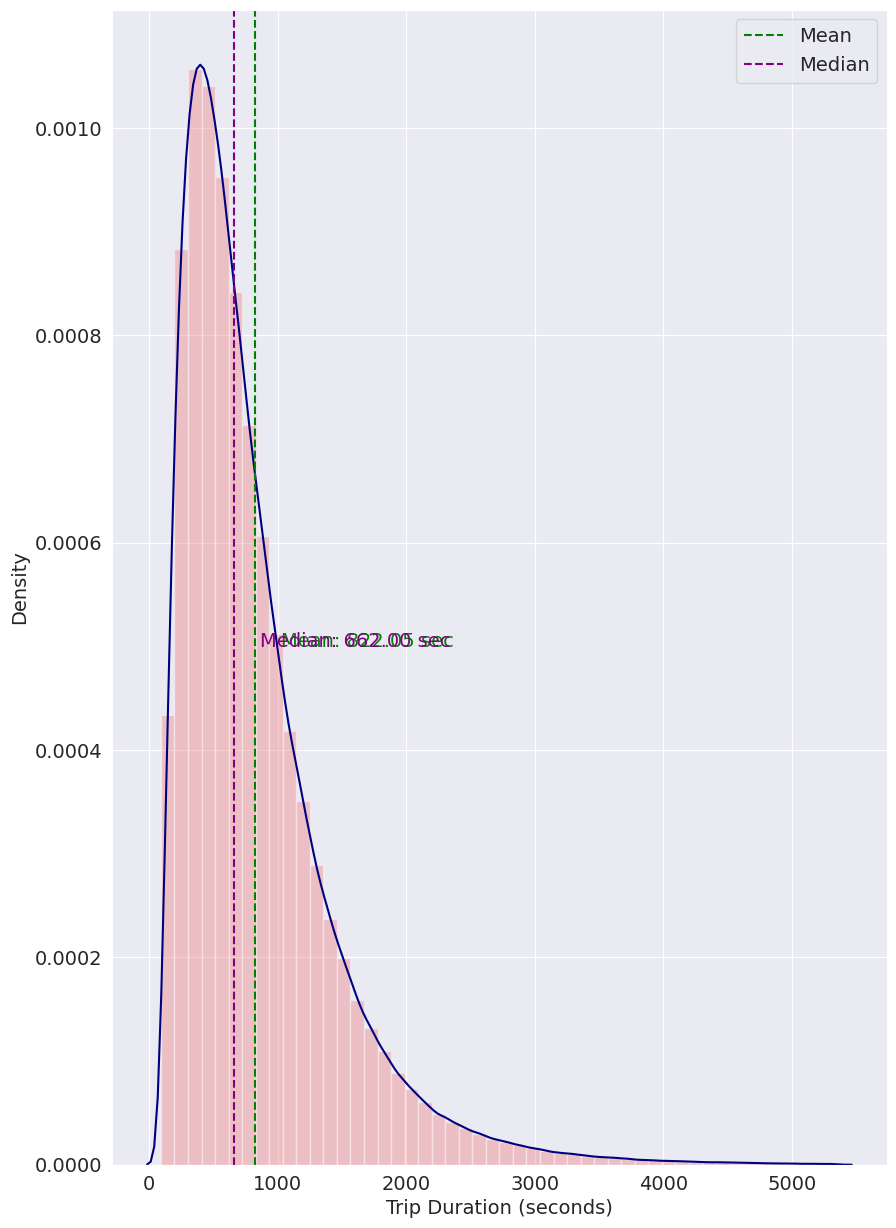

In [ ]:
# Set the figure size for the distribution plot
plt.figure(figsize=(10, 15))

# Create a distribution plot for the target variable 'trip_duration'
sns.distplot(nyc_df['trip_duration'], color='skyblue', kde_kws={'color': 'navy'}, hist_kws={'color': 'lightcoral'})

# Add labels and a vertical line for the mean
plt.xlabel('Trip Duration (seconds)')
plt.axvline(nyc_df['trip_duration'].mean(), color='green', linestyle='--', label='Mean')
plt.text(nyc_df['trip_duration'].mean() + 200, 0.0005, f"Mean: {nyc_df['trip_duration'].mean():.2f} sec", color='green')

# Add a vertical line for the median
plt.axvline(nyc_df['trip_duration'].median(), color='purple', linestyle='--', label='Median')
plt.text(nyc_df['trip_duration'].median() + 200, 0.0005, f"Median: {nyc_df['trip_duration'].median():.2f} sec", color='purple')

# Set a legend for the mean and median lines
plt.legend()

# Display the distribution plot
plt.show()


Looks right skewed distribution . We need transformation technique to remove skewness

Some methods to remove skewness are :

* square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

* log for greater skew:log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

* inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

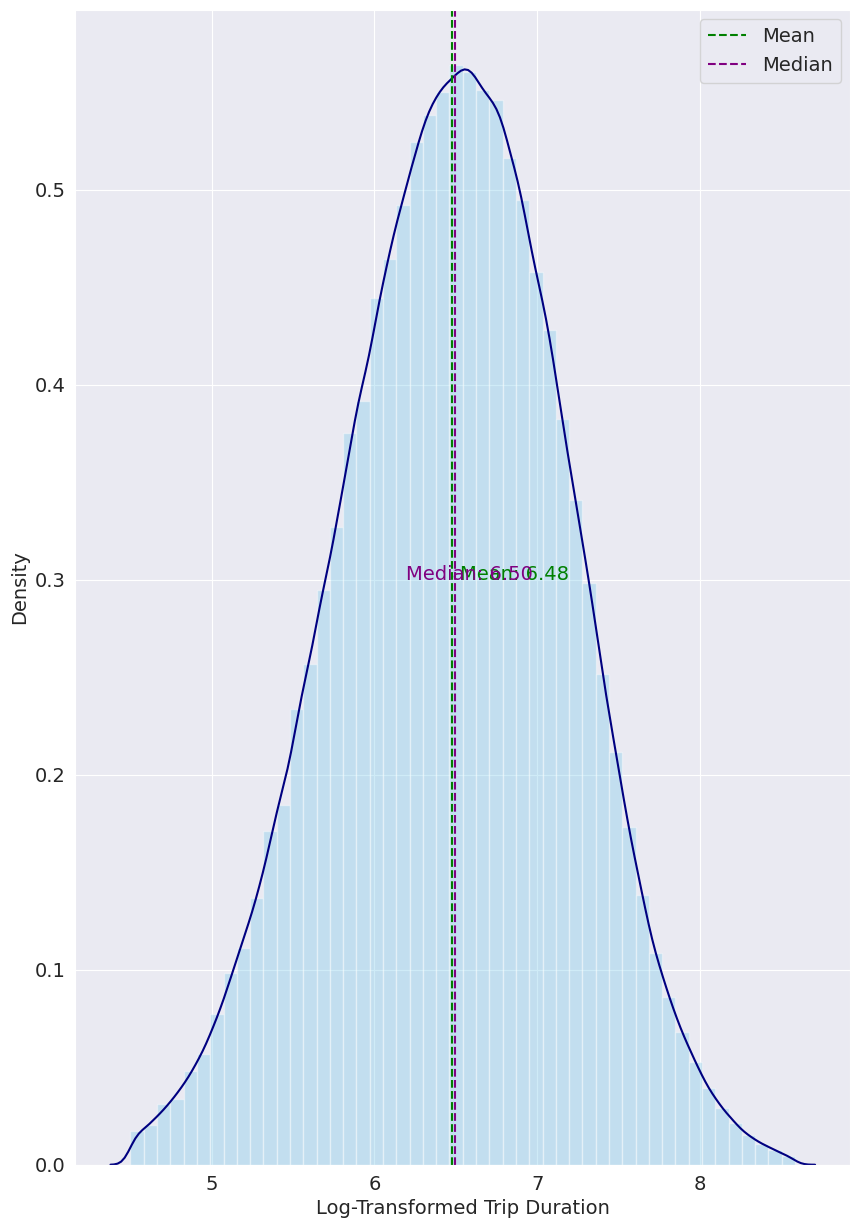

In [ ]:
# Set the figure size for the distribution plot
plt.figure(figsize=(10, 15))

# Create a distribution plot for the log-transformed 'trip_duration'
sns.distplot(np.log(nyc_df['trip_duration']), color='lightcoral', kde_kws={'color': 'navy'}, hist_kws={'color': 'skyblue'})

# Add labels and a vertical line for the mean
plt.xlabel('Log-Transformed Trip Duration')
plt.axvline(np.log(nyc_df['trip_duration']).mean(), color='green', linestyle='--', label='Mean')
plt.text(np.log(nyc_df['trip_duration']).mean() + 0.05, 0.3, f"Mean: {np.log(nyc_df['trip_duration']).mean():.2f}", color='green')

# Add a vertical line for the median
plt.axvline(np.log(nyc_df['trip_duration']).median(), color='purple', linestyle='--', label='Median')
plt.text(np.log(nyc_df['trip_duration']).median() - 0.3, 0.3, f"Median: {np.log(nyc_df['trip_duration']).median():.2f}", color='purple')

# Set a legend for the mean and median lines
plt.legend()

# Display the distribution plot
plt.show()


Now the distribution looks normal

##**Checking distribution of numerical variabes**

In [ ]:
numeric_variables=nyc_df.describe().columns

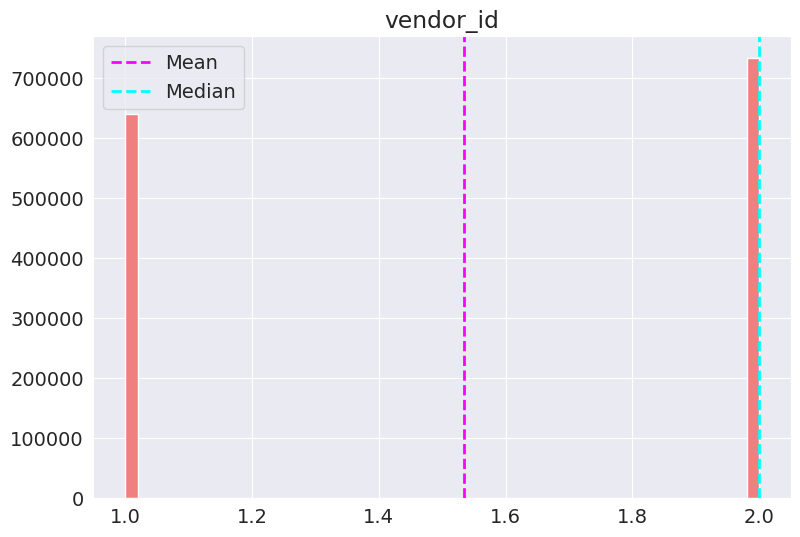

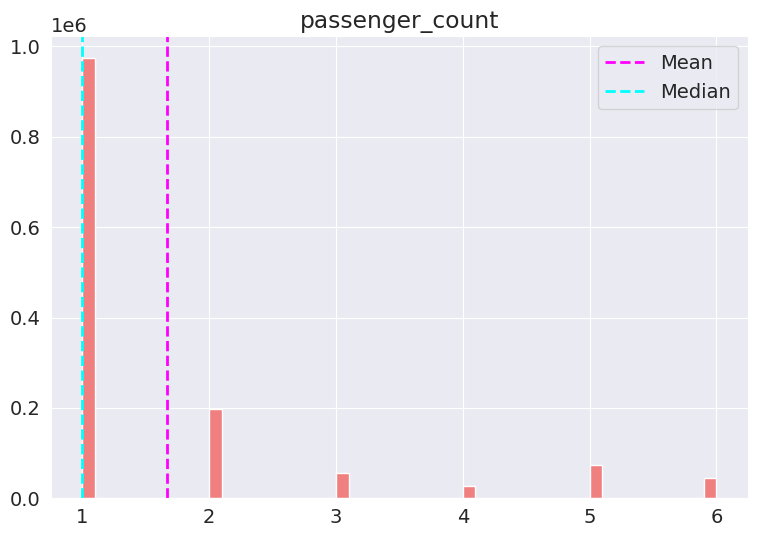

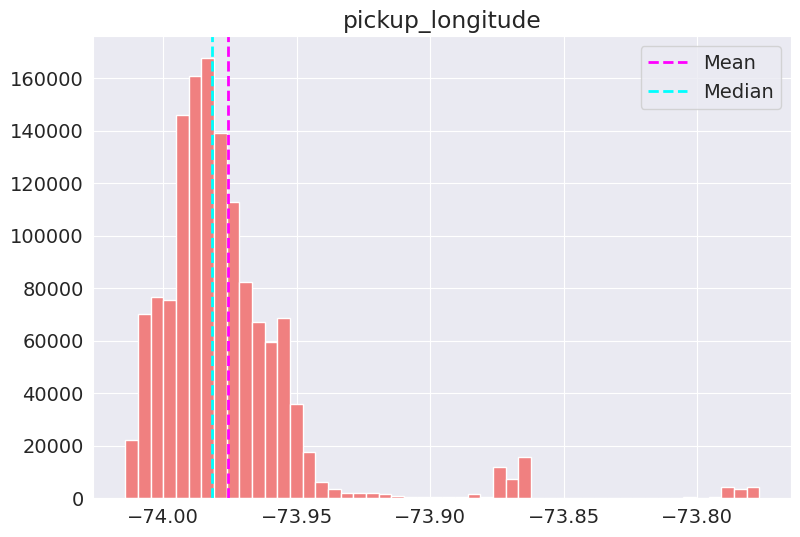

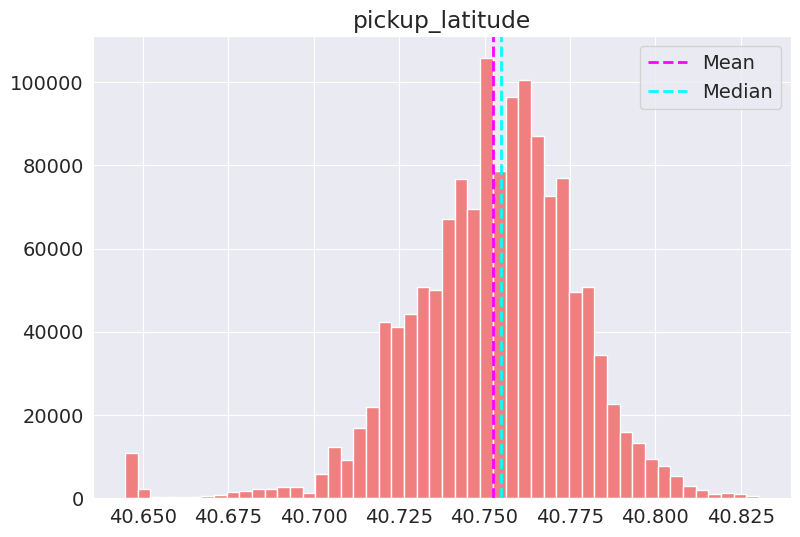

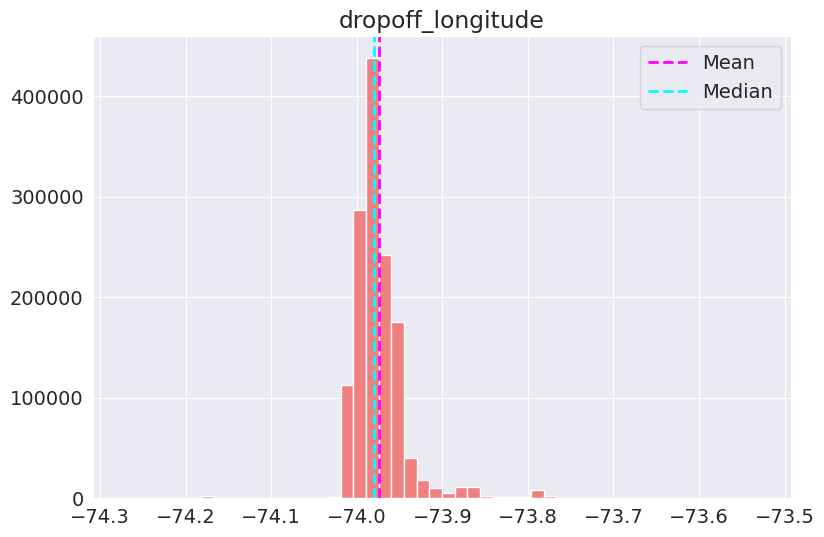

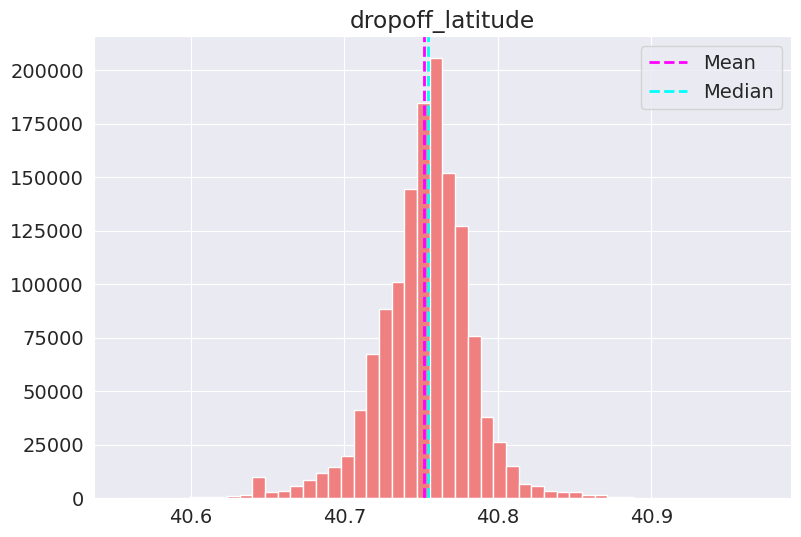

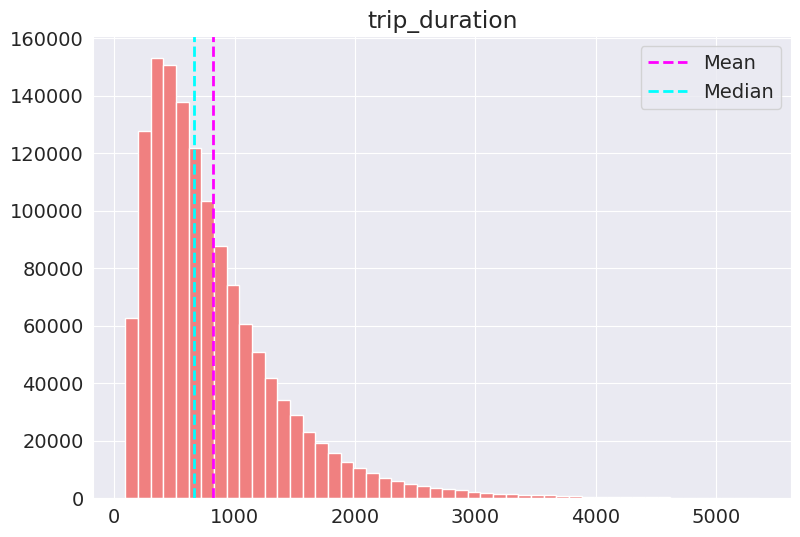

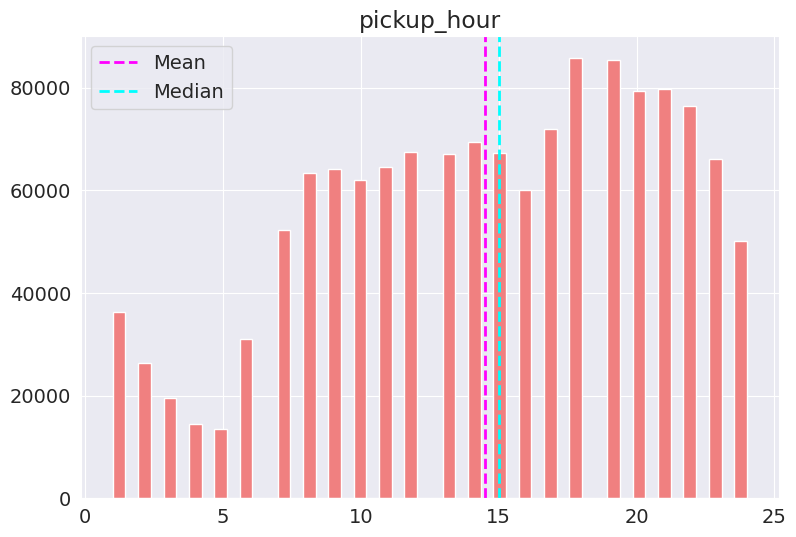

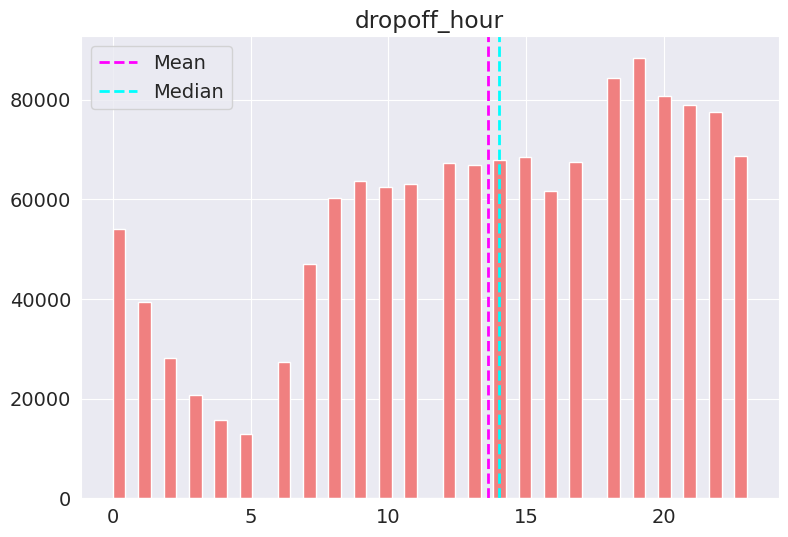

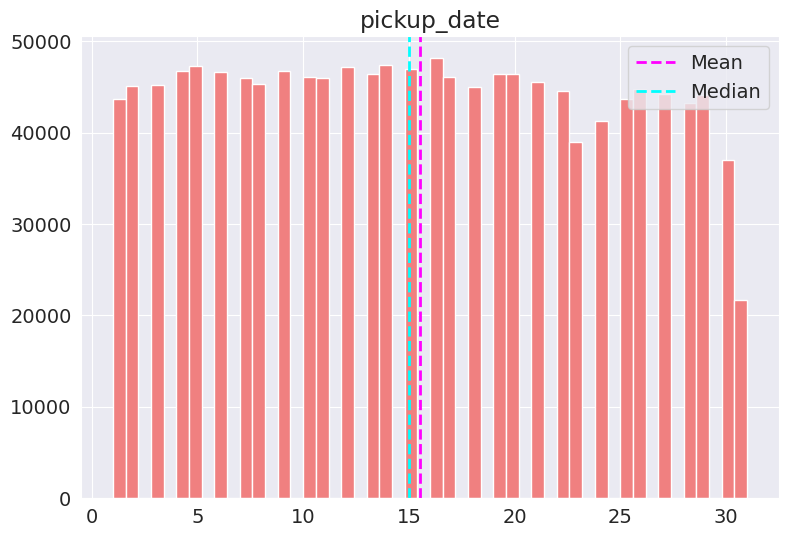

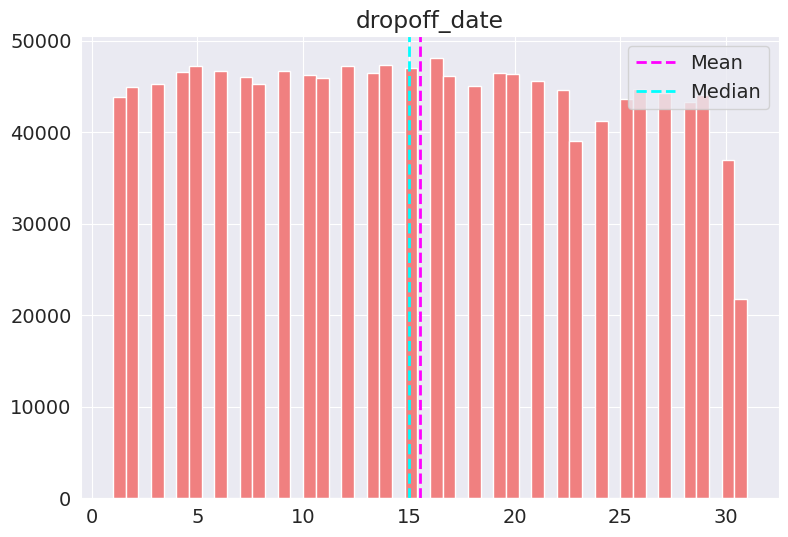

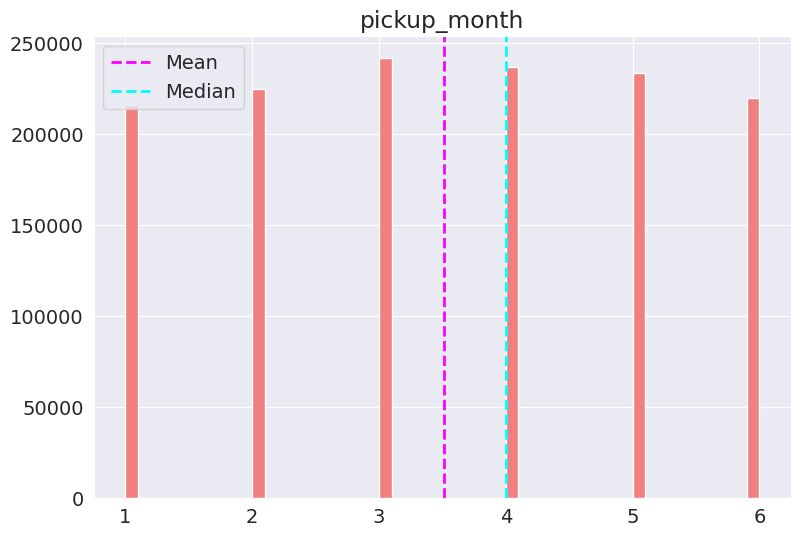

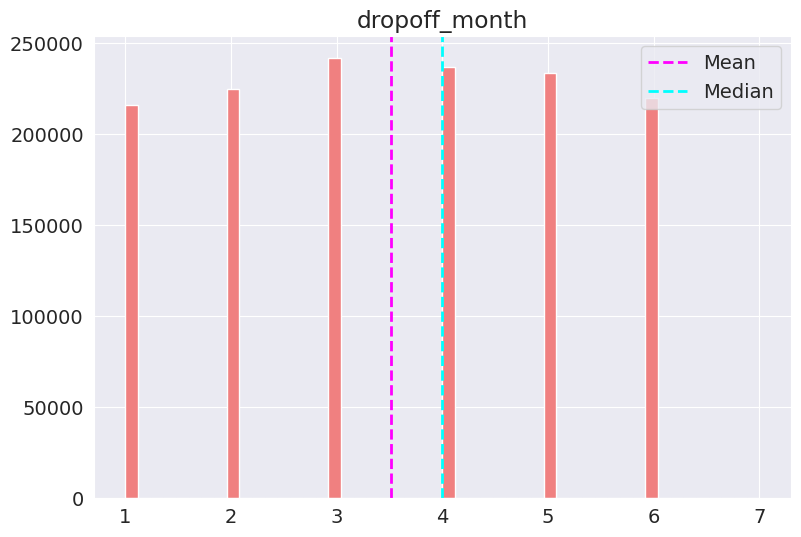

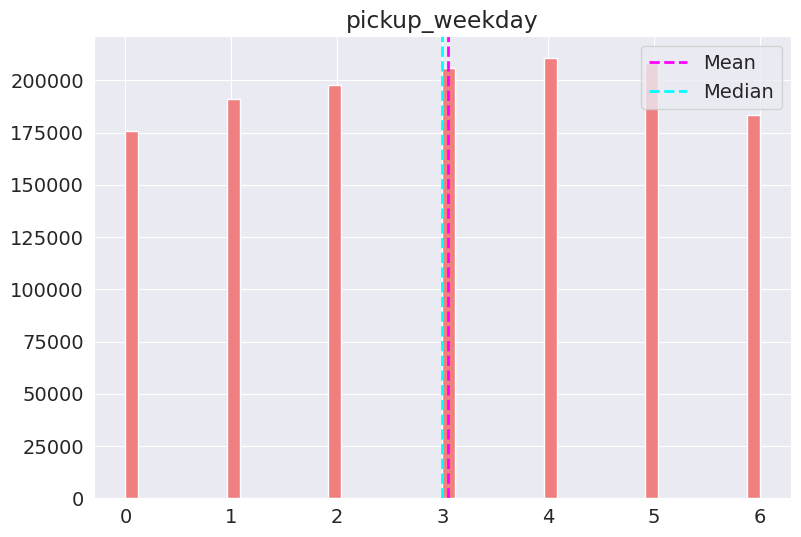

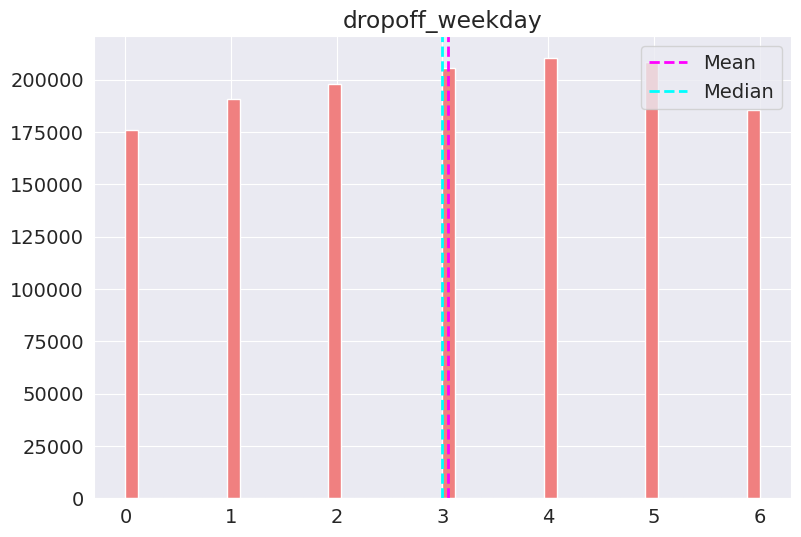

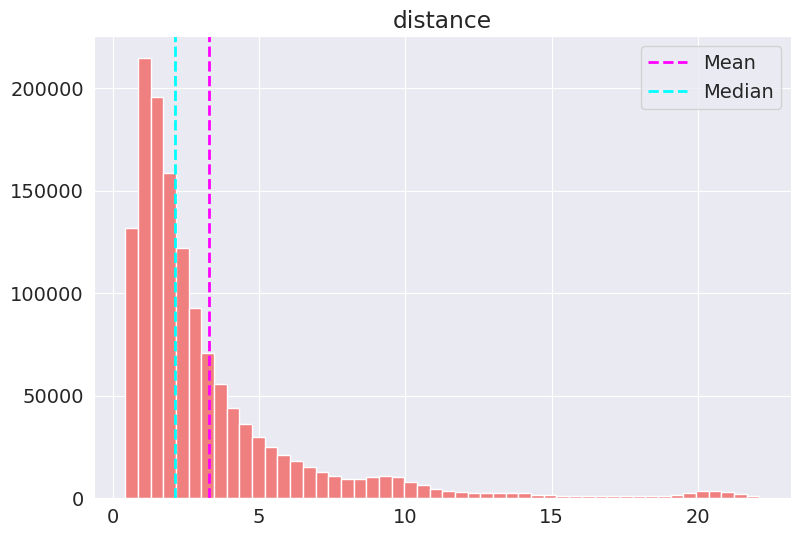

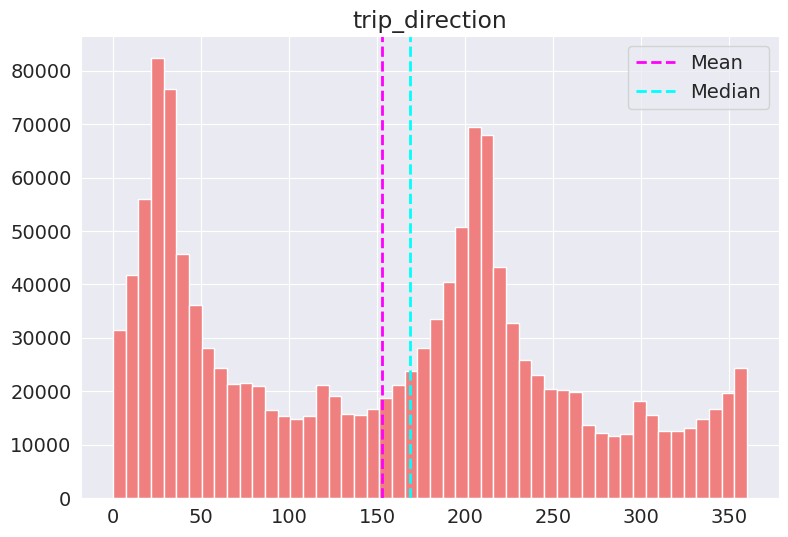

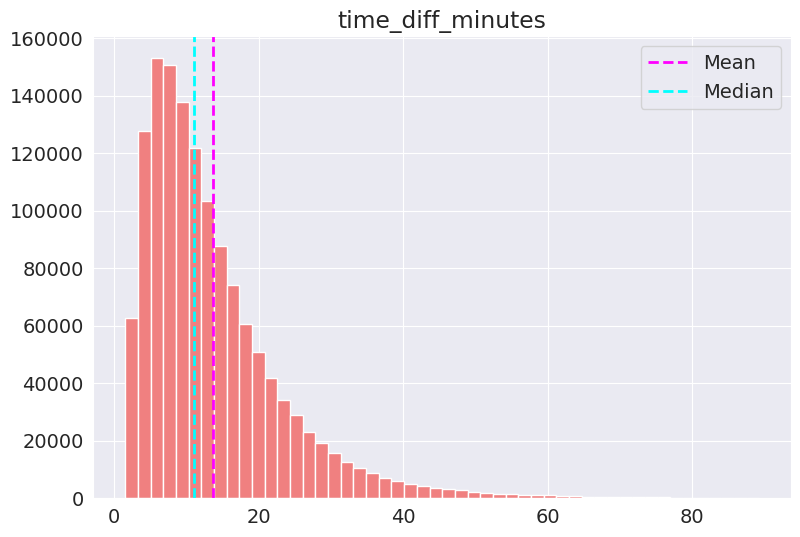

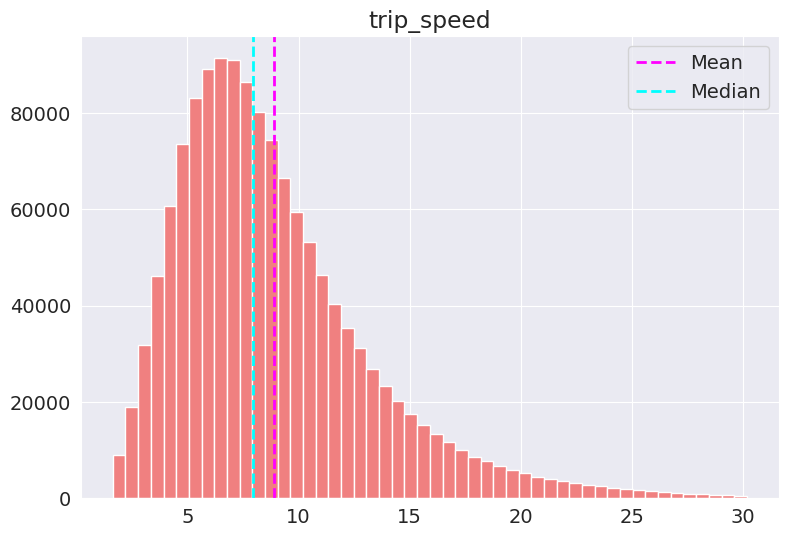

In [ ]:
# Iterate through each numerical feature
for col in numeric_variables:
    # Create a new figure with a specific size for the histogram plot
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    # Get the feature data
    feature = nyc_df[col]

    # Create a histogram with 50 bins for the feature
    feature.hist(bins=50, ax=ax, color='lightcoral')

    # Add vertical dashed lines for the mean and median
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')

    # Set the title of the plot to the feature name
    ax.set_title(col)

    # Add a legend for the mean and median lines
    ax.legend()

# Display all the histogram plots
plt.show()


* Treating the skewness in the distance feature using log transform.

* trip_speed,time_diff_minutes features are highly in correaltion with our target variable and it may result in data leakage and getting high accuracy near to 100 percentage hence we will not handle the skewness in these features and directly drop these features before model buliding

### Lets check distribution of distance

Text(0.5, 0, 'distance')

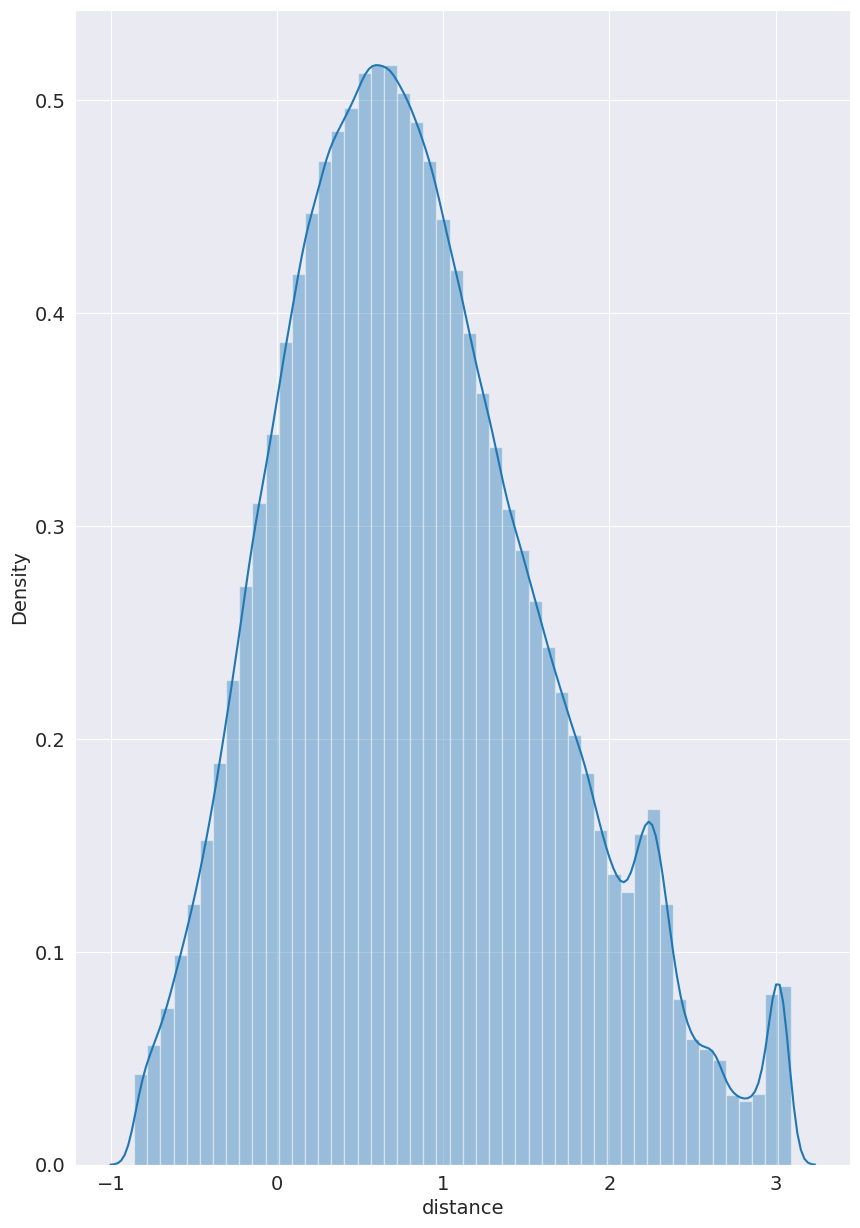

In [ ]:
plt.figure(figsize=(10,15))
sns.distplot(np.log(nyc_df['distance']))
plt.xlabel('distance')

## **Checking Linear Relationships**

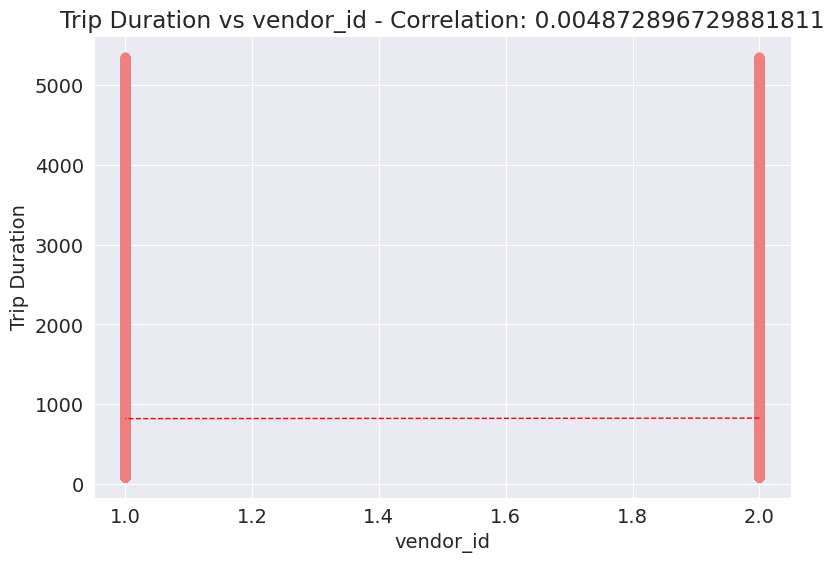

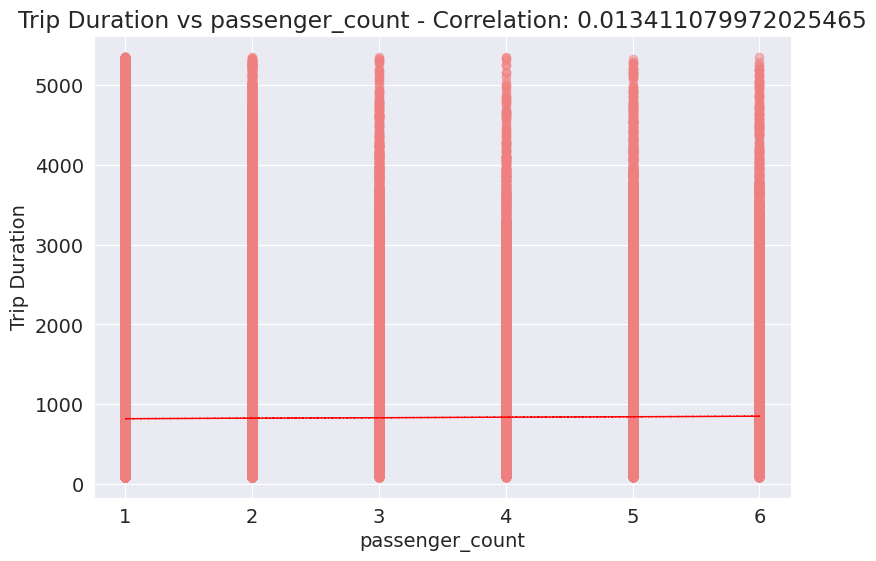

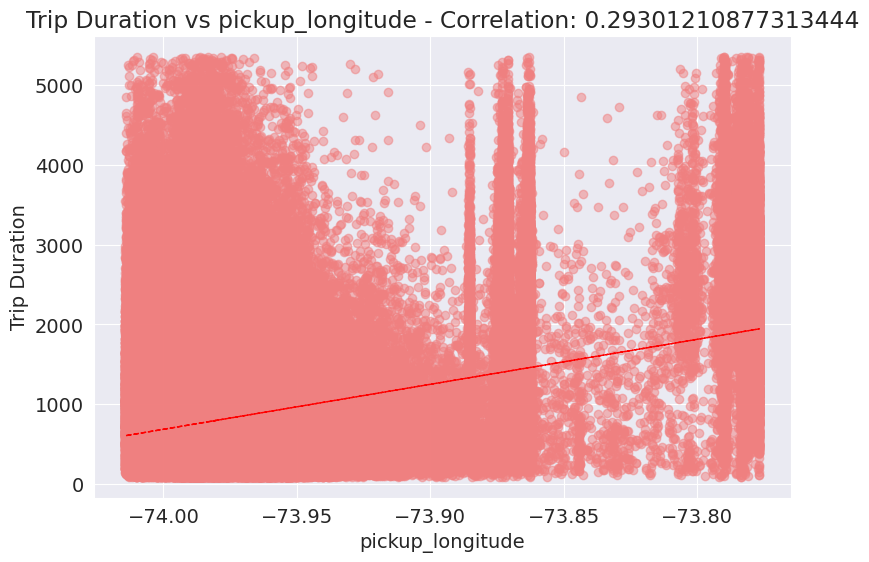

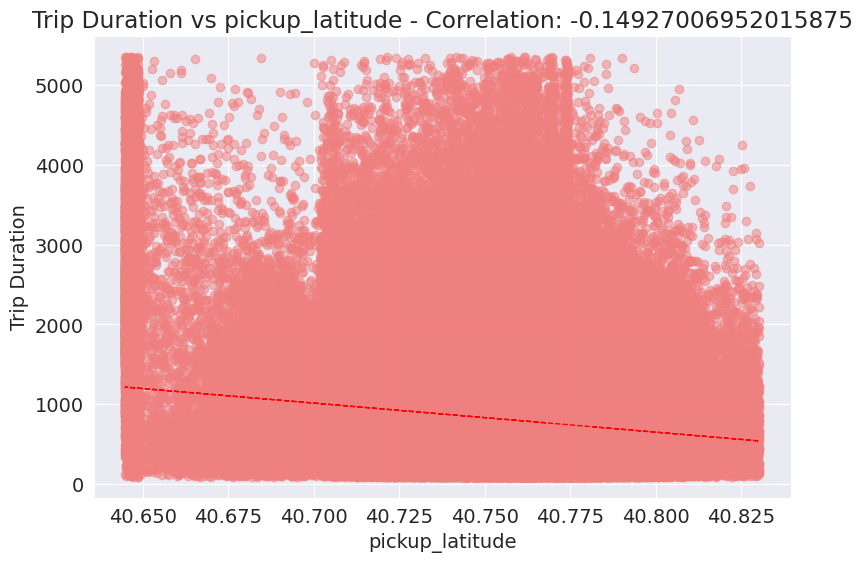

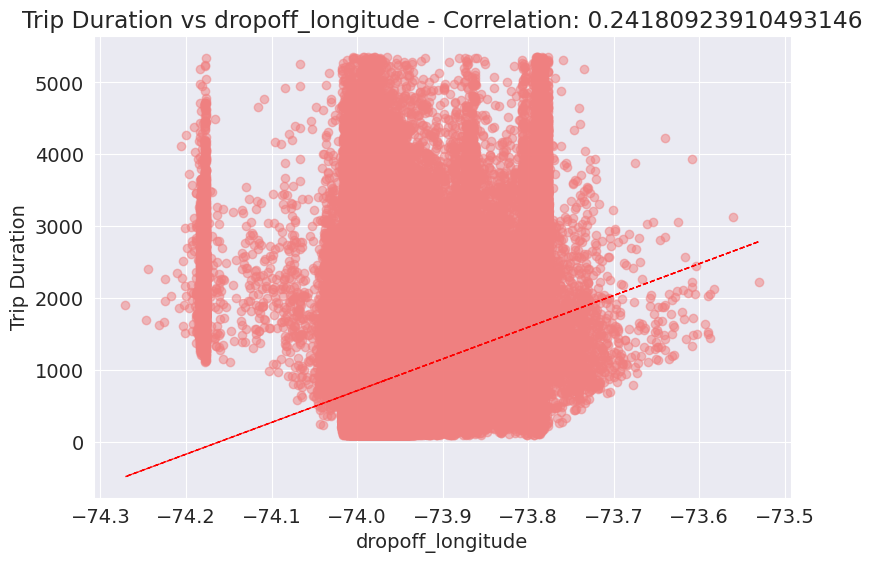

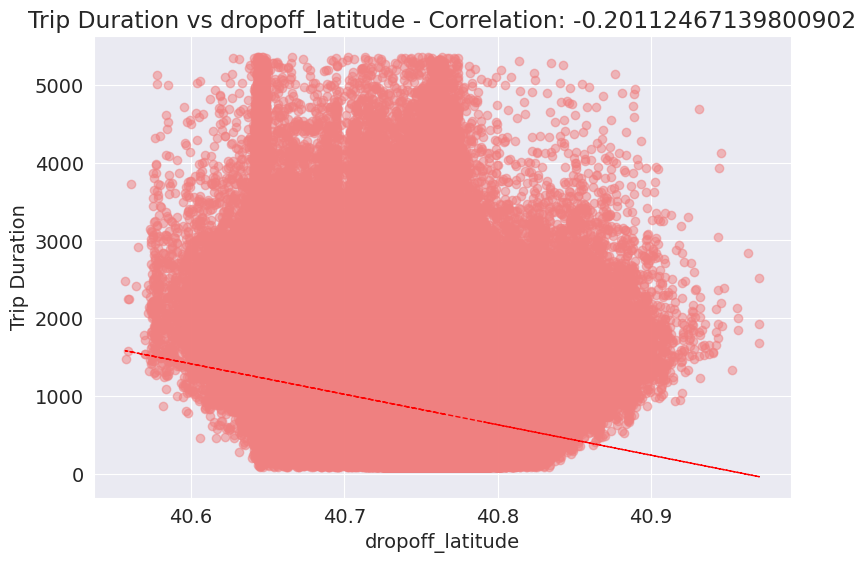

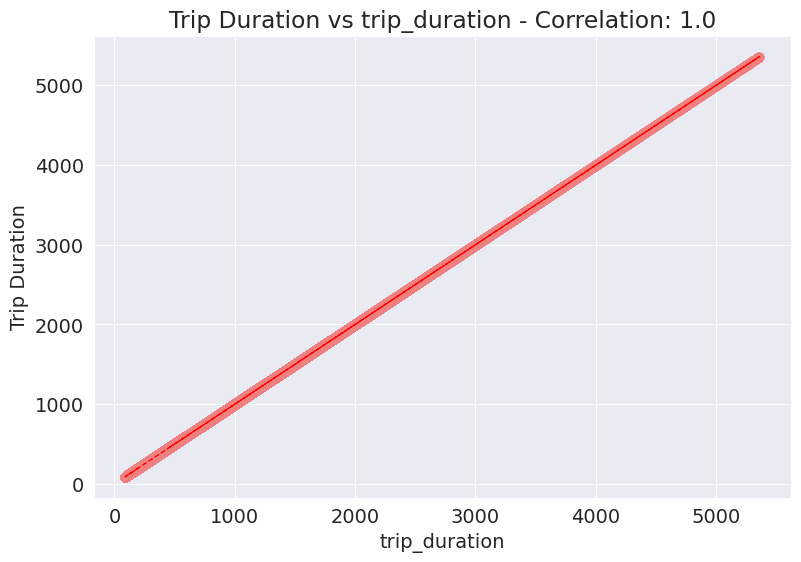

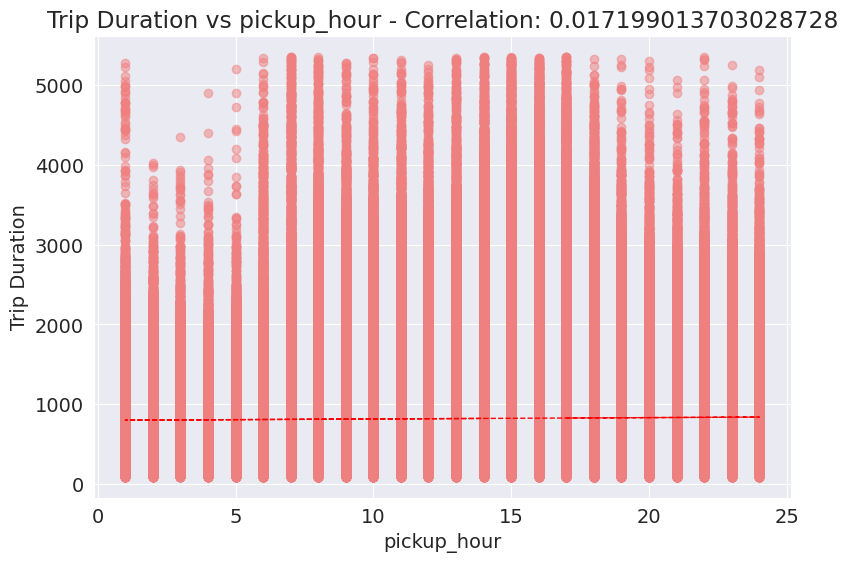

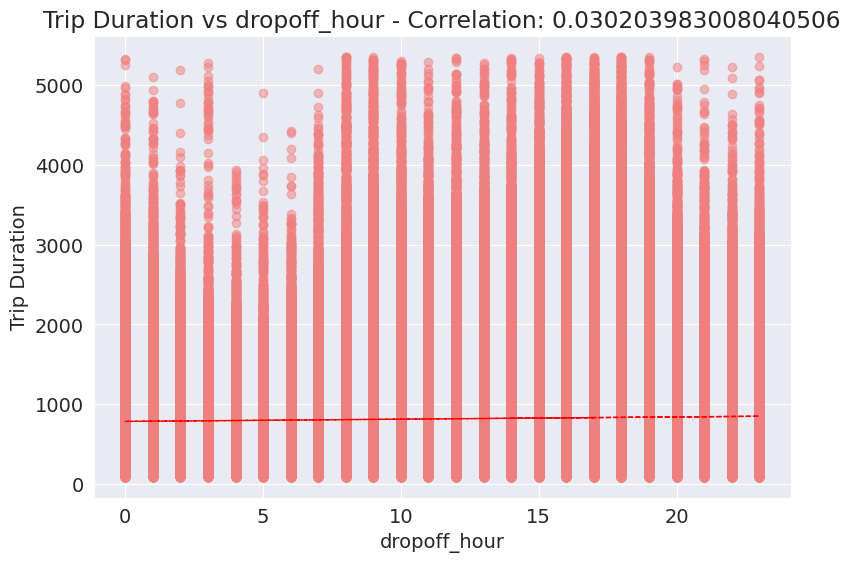

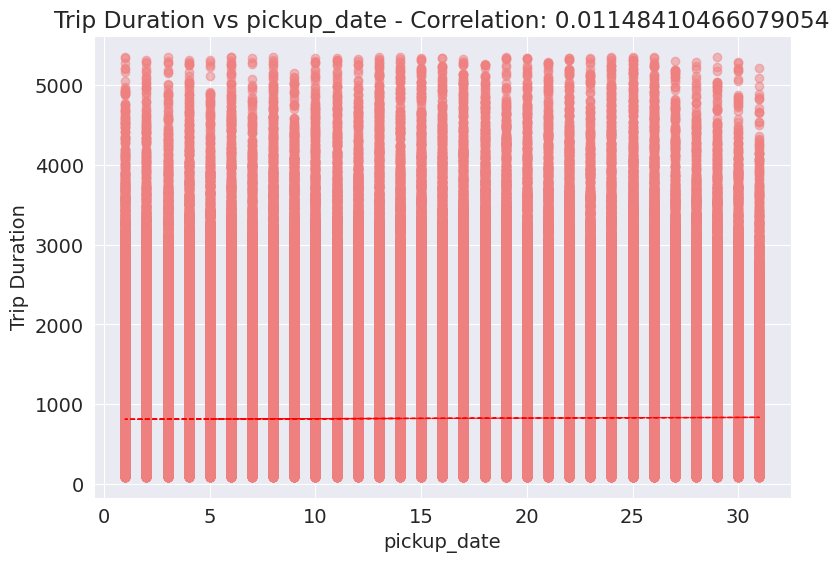

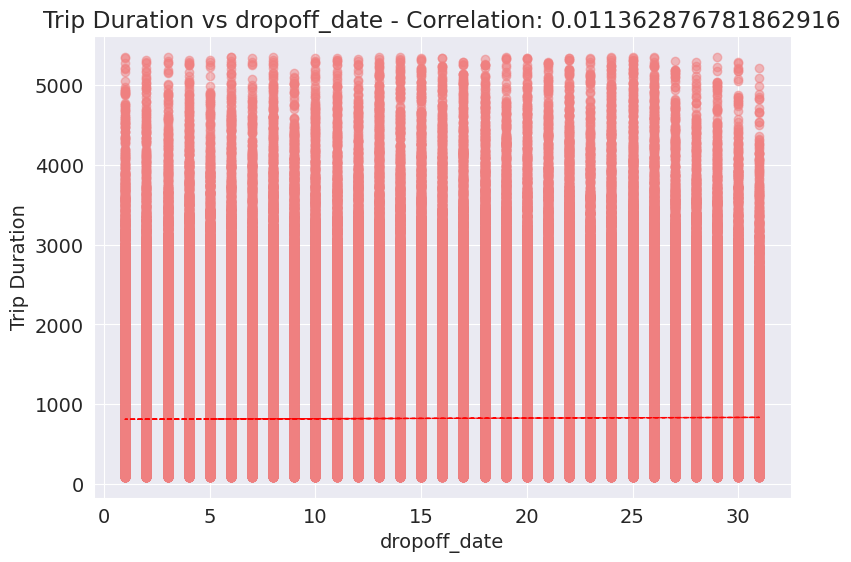

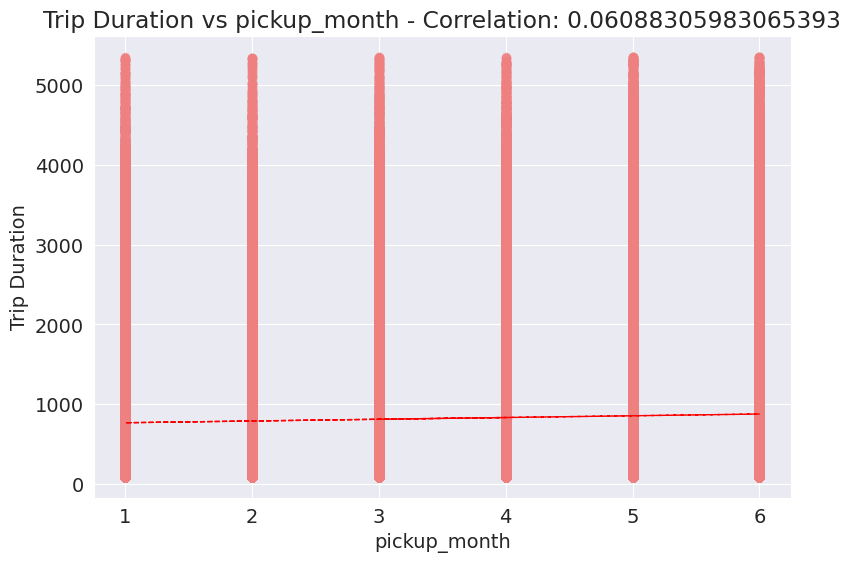

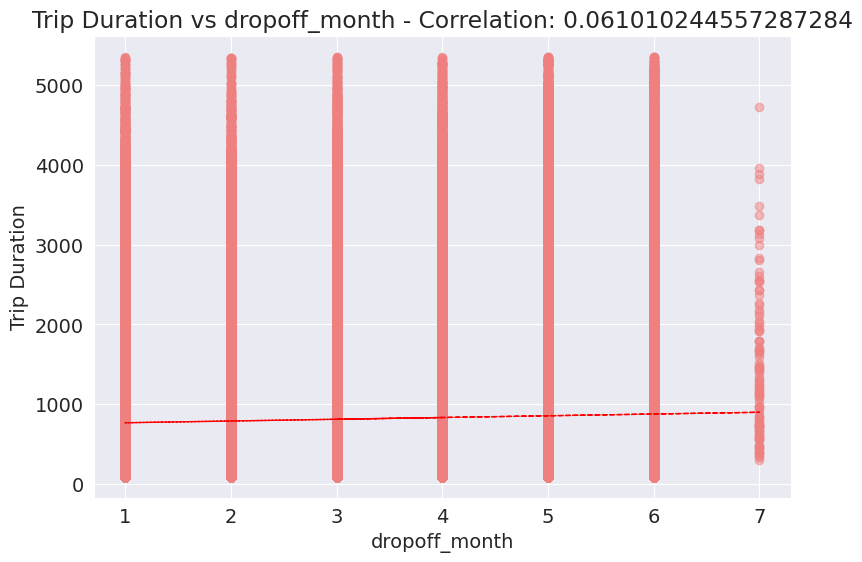

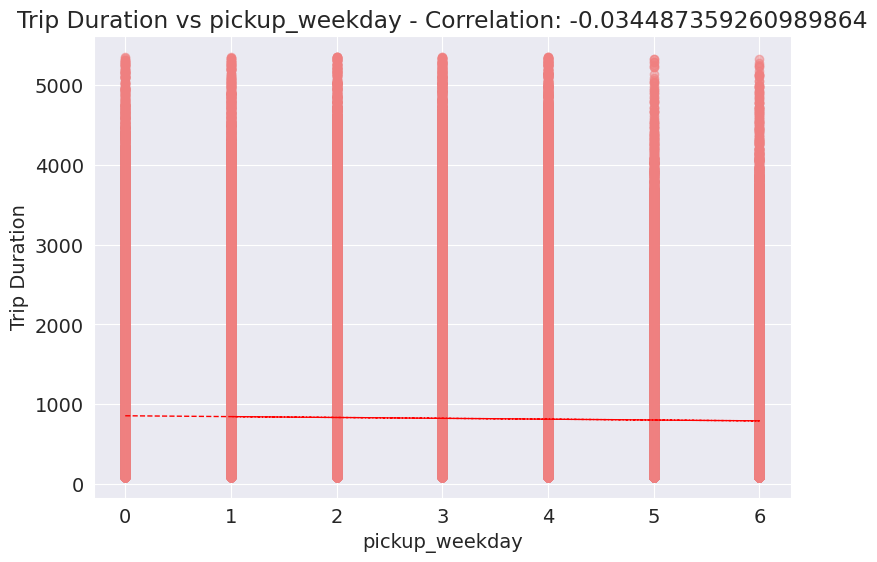

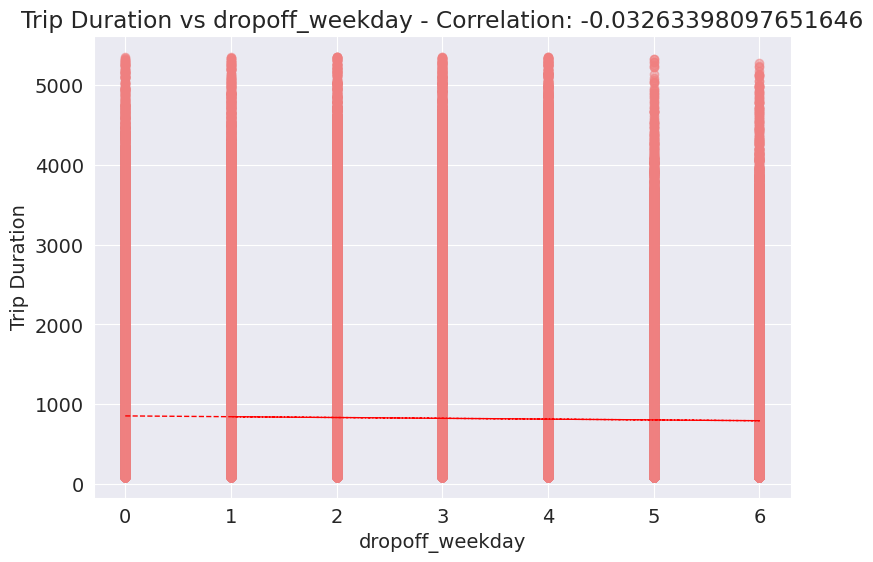

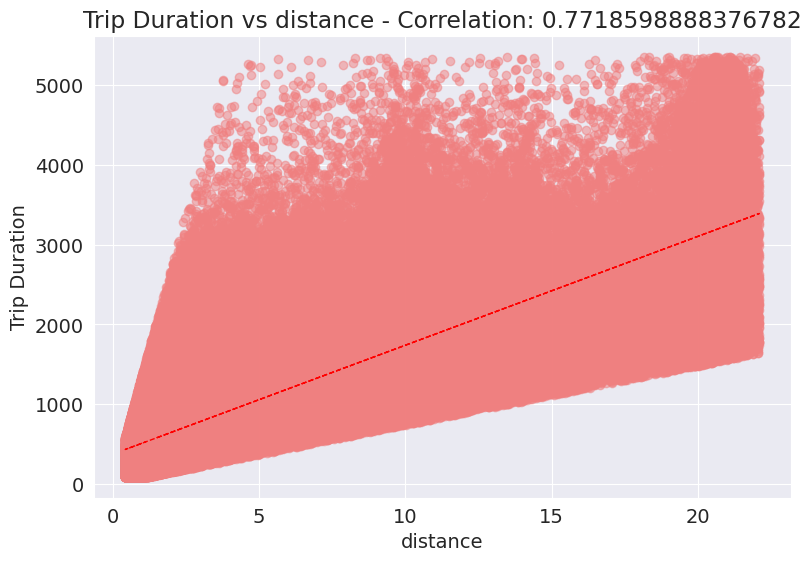

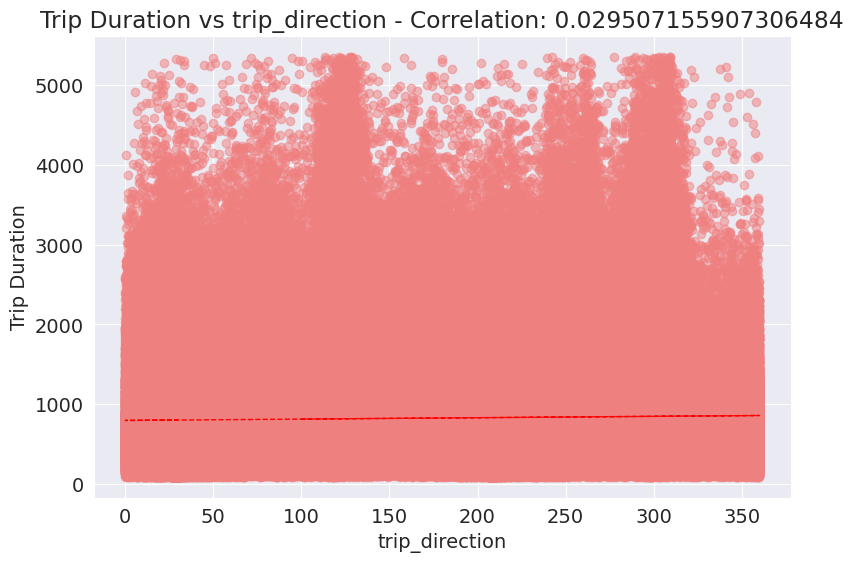

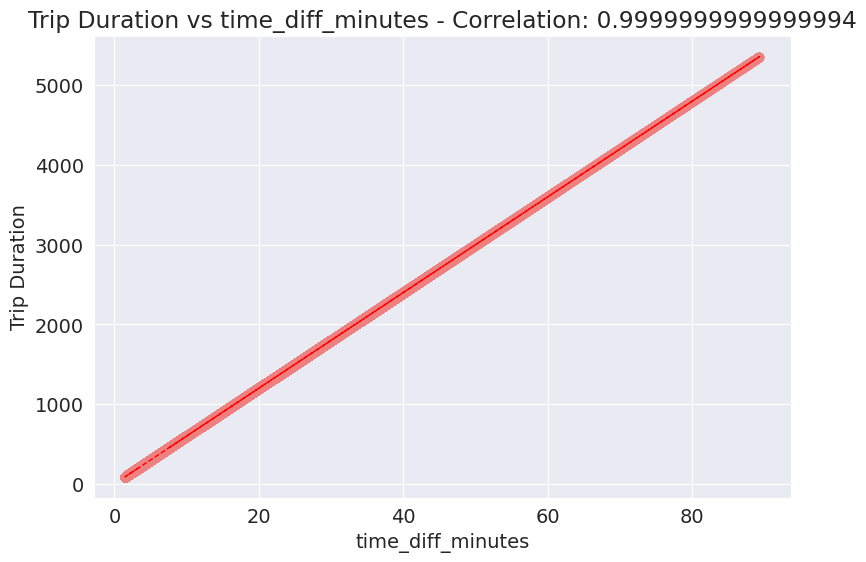

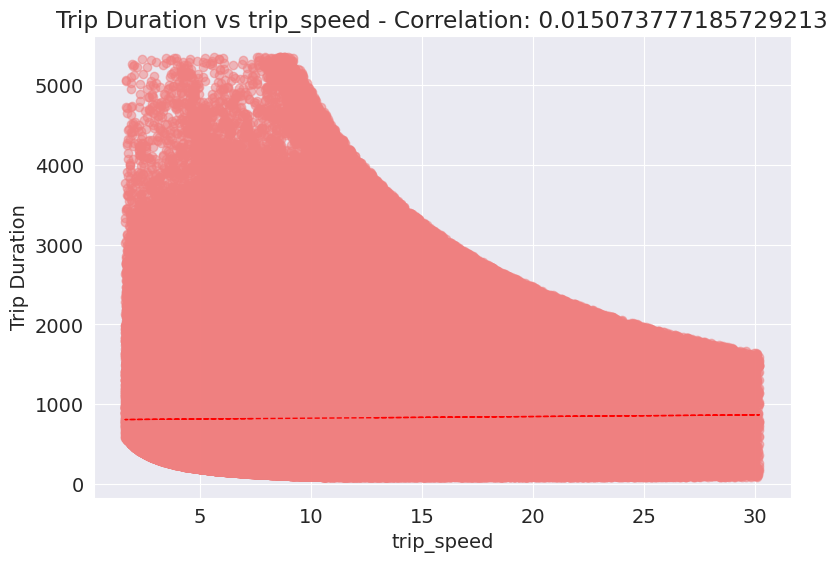

In [ ]:
# Iterate through each numerical feature
for col in numeric_variables[:]:
    # Create a new figure with a specific size for the scatter plot
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    # Get the feature data
    feature = nyc_df[col]
    label = nyc_df['trip_duration']

    # Calculate the correlation between the feature and 'trip_duration'
    correlation = feature.corr(label)

    # Create a scatter plot
    plt.scatter(x=feature, y=label, color='lightcoral', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Trip Duration')

    # Set the title of the plot to show feature vs. trip_duration and its correlation
    ax.set_title('Trip Duration vs ' + col + ' - Correlation: ' + str(correlation))

    # Fit a regression line to the data
    z = np.polyfit(nyc_df[col], nyc_df['trip_duration'], 1)
    y_hat = np.poly1d(z)(nyc_df[col])

    # Plot the regression line in red dashes
    plt.plot(nyc_df[col], y_hat, "r--", lw=1)

# Display all the scatter plots
plt.show()


From above plot we can conclude that only trip_distance and trip_speed were having a linear relationship with trip_duration



## **Encoding Categorical Features**

In [ ]:
#copy the dataframe
nyc_df_copy = nyc_df.copy()

In [ ]:
#drop these columns
nyc_df_copy.drop(labels=['dropoff_timezone','store_and_fwd_flag',],axis=1,inplace=True)

In [ ]:
# One hot encoding on pickup_timezone feature
nyc_df_copy = pd.get_dummies(nyc_df_copy,columns=["pickup_timezone"],prefix=["pickup_timezone"])

In [ ]:

nyc_df_copy.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude  trip_duration  ...  pickup_weekday  dropoff_weekday  \
0         40.765602            455  ...               0                0   
1         40.731152            663  ...               6                6   
2         40.710087           2124  ...               1                1   
3         40.706718            429  ...               2                2   
4         40.782520            435  ...               5                5   

   distance trip_direction  time_diff_minutes  trip_speed  \
0  1.498523      99.970196           7.583333    7.362705   
1  1.805510     242.846232          11.050000    6.087959   
2  6.385108     200.319835          35.400000    6.720462   
3  1.485501     187.262300           7.150000    7.741069   
4  1.188590     179.473585           7.250000    6.108411   

   pickup_timezone_Afternoon  pickup_timezone_Evening  \
0                          0                        1   
1                          0                        0   
2                          0                        0   
3                          0                        1   
4                          1                        0   

   pickup_timezone_Late night  pickup_timezone_Morning  
0                           0                        0  
1                           1                        0  
2                           0                        1  
3                           0                        0  
4                           0                        0  

[5 rows x 28 columns]

## Handling Skewness in numerical features using log Transform

In [ ]:
nyc_df_copy['distance'] = nyc_df_copy['distance'].map(lambda x : np.log(x) if x != 0 else 0)

In [ ]:

nyc_df_copy['pickup_month'] = nyc_df_copy['pickup_month'].map(lambda x : np.log(x) if x != 0 else 0)
nyc_df_copy['pickup_hour'] = nyc_df_copy['pickup_hour'].map(lambda x : np.log(x) if x != 0 else 0)
nyc_df_copy['passenger_count'] = nyc_df_copy['passenger_count'].map(lambda x : np.sqrt(x) if x != 0 else 0)

In [ ]:
nyc_df_copy.shape


(1373771, 28)

## **Feature Selection**

We cannot use all the columns from the dataframe because some of them are datetime and some of them were calculated based on the target variable such as trip_speed_mph.

So, we will use only the following columns: cols_to_use = ['vendorid', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_month', 'pickup_weekday', 'pickup_hour', 'distance, 'trip_direction', 'trip_duration']

In [ ]:
features = ['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']

In [ ]:
features.extend(['pickup_timezone_Afternoon', 'pickup_timezone_Evening',
       'pickup_timezone_Late night', 'pickup_timezone_Morning'])

## **Splitting the data**

In [ ]:
#Splitting data
X = nyc_df_copy[features] #Independent features
y = np.log(nyc_df_copy['trip_duration'])  #Dependent features

In [ ]:
X.shape, y.shape

((1373771, 16), (1373771,))

In [ ]:
X = nyc_df_copy[features] #Independent features
y = np.log(nyc_df_copy['trip_duration'])  #Dependent features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1099016, 16)
(274755, 16)


In [ ]:
# Import the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
sc = StandardScaler()

# Apply the StandardScaler to the selected features in the training set
X_train[features] = sc.fit_transform(X_train[features])

# Apply the same StandardScaler to the selected features in the test set
X_test[features] = sc.transform(X_test[features])


**Buliding a base model using Linear Regression**

We have many variables such as the pickup/dropoff month, weekday, hour of the day, trip direction which are not linear variables and can be difficult for a linear regression (LR) algorithm to model without first converting these variables to appropriate forms that can be fed to the LR models and understood by it. And, we also need to scale the data to prevent the dominance of larger magnitude variables in LR models.


But before moving onto  random forest let’s check the performance of LR using only few significant variables which have vif values below 5,hence there will be no multicollinearirty

We have to satisfy linear regression assumption inorder to use a linear regression model.

In [ ]:
#calculating vif score
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i  in [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']]])

variables       VIF
0  passenger_count  2.437565
1      pickup_hour  4.834519
2      pickup_date  3.557373
3     pickup_month  4.244865
4   pickup_weekday  3.021079
5         distance  1.854131
6   trip_direction  2.847066

In [ ]:
#Creating new feature list
features1= [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance','trip_direction'
 ]
features1

['passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date',
 'distance',
 'trip_direction']

In [ ]:
#splitting data again
X1 = nyc_df_copy[features1] #Independent features
y1 = np.log(nyc_df_copy['trip_duration'])  #Dependent features

## **Linear Regression**

In [ ]:
#splitting data again
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split( X1,y1 , test_size = 0.2, random_state = 0)
print(X1_train.shape)
print(X1_test.shape)

(1099016, 7)
(274755, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X1_train[features1]=sc.fit_transform(X_train[features1])
X1_test[features1]=sc.transform(X_test[features1])

In [ ]:
#fitting data into the model
reg = LinearRegression().fit(X1_train, y1_train)

In [ ]:
#regression score
reg.score(X1_train, y1_train)

0.6517632714503815

In [ ]:
#coefficient
reg.coef_

array([ 0.00541435, -0.03090333,  0.04719984,  0.02261548,  0.00396016,
        0.55826879,  0.05857122])

In [ ]:
#intercept

reg.intercept_

6.479281679133733

In [ ]:
# Predicting the Test set results using training data
y_pred_train = reg.predict(X1_train)

In [ ]:
y_pred_train

array([8.11533007, 5.50623128, 6.04421903, ..., 6.8011347 , 6.02499813,
       7.17386907])

**Regression Evaluation Metrics**

In [ ]:
# Predicting the Test set results using test data
y_pred_test = reg.predict(X1_test)

In [ ]:
#predicting y values
y_pred_test

array([7.0669944 , 6.36024378, 6.28134178, ..., 5.82126291, 6.48273482,
       6.91318195])

In [ ]:
# Test performance using Evaluation metrics
MSE  = round(mean_squared_error((y_test), (y_pred_test)),2)
print("MSE :" , MSE)

MAE= round(mean_absolute_error((y_test), (y_pred_test)),2)
print("MAE :" ,MAE)

RMSE = round(np.sqrt(MSE) ,2)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_test)),2)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2))

MSE : 0.17
MAE : 0.32
RMSE : 0.41
R2 : 0.65
Adjusted R2 :  0.65



## **Plotting a Scatter plot on Actual vs Predicted trip duration Values**

Text(0, 0.5, 'Predicted trip duration')

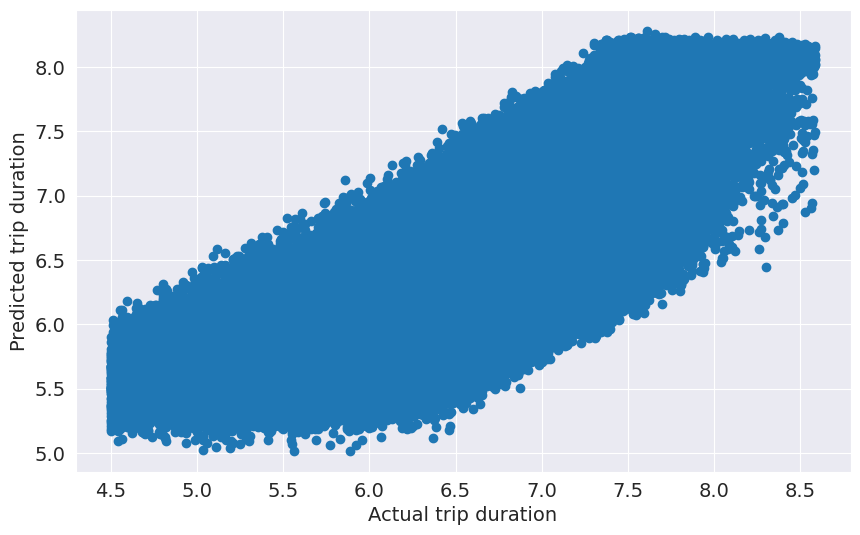

In [ ]:
#scatter plot
plt.scatter((y_test), (y_pred_test))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

Text(0, 0.5, 'residuals')

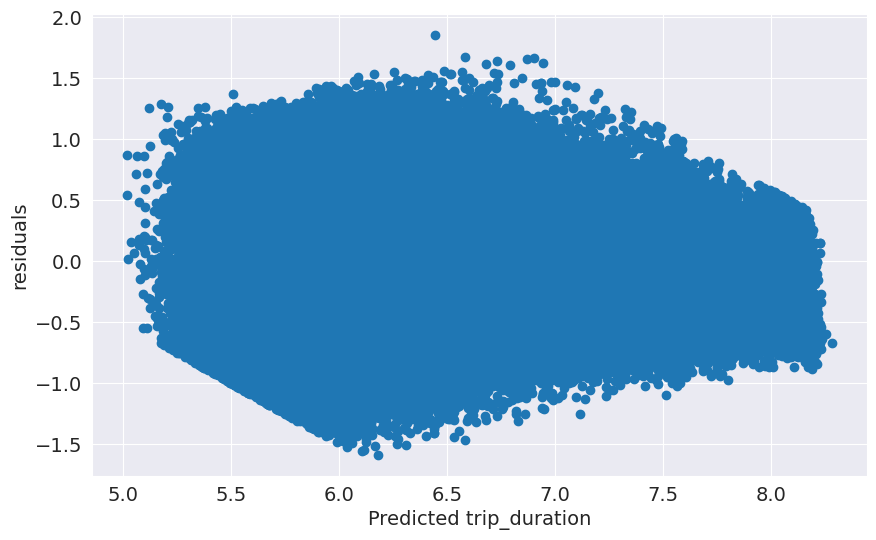

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted trip_duration')
plt.ylabel('residuals')

## **Random Forest and Hyperparameter Tunning**

In [ ]:
#importing reqd libraries
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf= RandomForestRegressor()

In [ ]:
#Setting various parameter for hyperparameter tuning
param_dict_rf = {
    'max_depth': [4, 6 ,7 ],
 'n_estimators': [80, 100]
  }

In [ ]:
# fitting randomsearch
rf_random = RandomizedSearchCV(estimator=rf,
                       param_distributions = param_dict_rf,
                       cv = 3, verbose=2)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .......................max_depth=4, n_estimators=80; total time= 4.4min
[CV] END .......................max_depth=4, n_estimators=80; total time= 4.2min
[CV] END .......................max_depth=4, n_estimators=80; total time= 4.2min
[CV] END ......................max_depth=4, n_estimators=100; total time= 5.2min
[CV] END ......................max_depth=4, n_estimators=100; total time= 5.2min
[CV] END ......................max_depth=4, n_estimators=100; total time= 5.2min
[CV] END .......................max_depth=6, n_estimators=80; total time= 6.3min
[CV] END .......................max_depth=6, n_estimators=80; total time= 6.0min
[CV] END .......................max_depth=6, n_estimators=80; total time= 5.9min
[CV] END ......................max_depth=6, n_estimators=100; total time= 7.6min
[CV] END ......................max_depth=6, n_estimators=100; total time= 7.6min
[CV] END ......................max_depth=6, n_est

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 7],
                                        'n_estimators': [80, 100]},
                   verbose=2)

In [ ]:
# print the best parameters after cross validation
print(rf_random.best_params_)

{'n_estimators': 80, 'max_depth': 7}


In [ ]:
#model scores
print('Train  neg_mean_squared_error score : ', rf_random.best_estimator_.score(X_train,y_train))
print('Test neg_mean_squared_error score: ', rf_random.best_estimator_.score(X_test,y_test))

Train  neg_mean_squared_error score :  0.7180383617008403
Test neg_mean_squared_error score:  0.7191968041039661


In [ ]:
#calculating predicting values
y_pred_rf = rf_random.predict(X_test)


In [ ]:
#Evaluating the model using regression metrics
MSE  = round(mean_squared_error((y_test), (y_pred_rf)), 2)
print("MSE :" , MSE)

MAE=round(mean_absolute_error((y_test), (y_pred_rf)),2)
print("MAE :" ,MAE)

RMSE = round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_rf)),2)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2))

MSE : 0.13
MAE : 0.29
RMSE : 0.36
R2 : 0.72
Adjusted R2 :  0.72


Text(0, 0.5, 'Predicted trip duration')

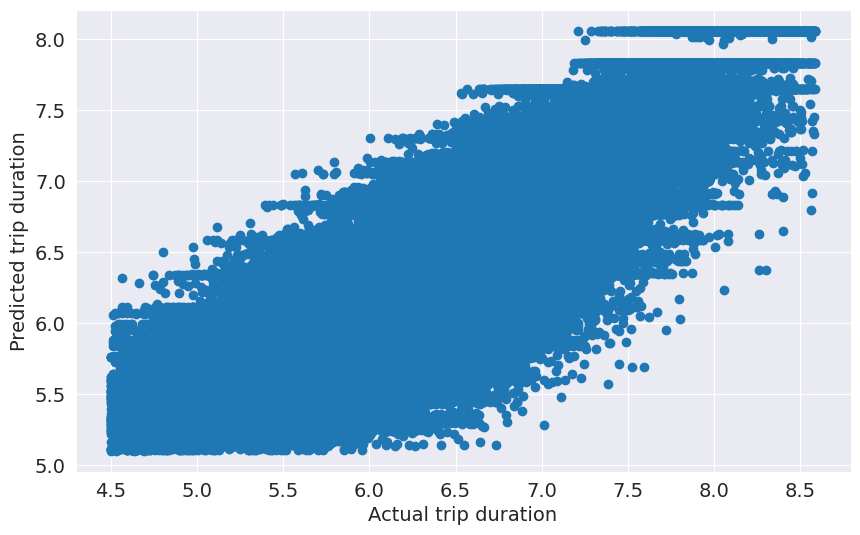

In [ ]:
#Scatter plot vs Actual & Predicted trip duration Values
plt.scatter((y_test), (y_pred_rf))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

Text(0, 0.5, 'residuals')

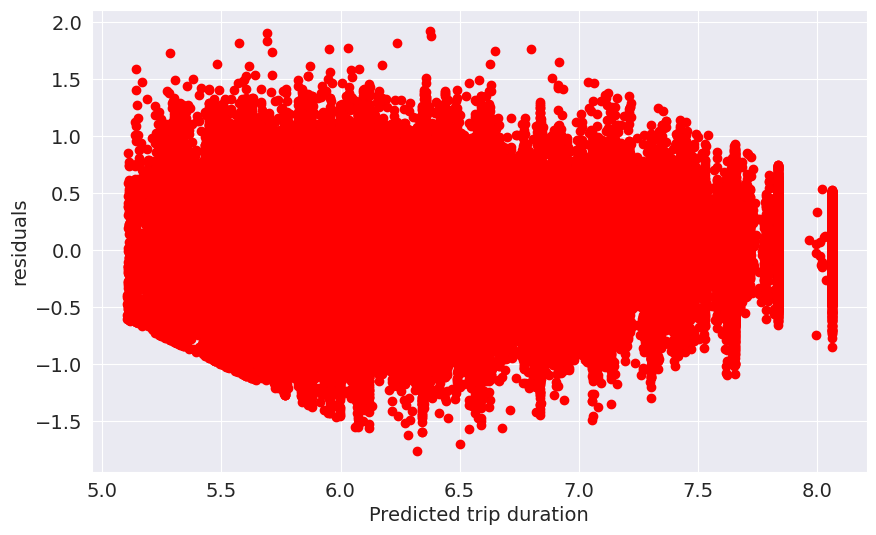

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_rf),(y_test)-(y_pred_rf),c='r')
plt.xlabel('Predicted trip duration')
plt.ylabel('residuals')

## **XG Boost and Hyperparameter Tunning**

In [ ]:
#importing reqd libraries
import xgboost as xg

In [ ]:
xgb = xg.XGBRegressor()

In [ ]:
#Setting various parameter for hyperparameter tuning
param_dict_xgb = {
    'max_depth': [4, 6, 7],
 'n_estimators': [60, 80]
  }

In [ ]:
#fitting Reandomsearch cv
xgb_random = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict_xgb,
                       cv = 5, verbose=2)

xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................max_depth=4, n_estimators=60; total time=   5.2s
[CV] END .......................max_depth=4, n_estimators=60; total time=   7.6s
[CV] END .......................max_depth=4, n_estimators=60; total time=   5.1s
[CV] END .......................max_depth=4, n_estimators=60; total time=   8.0s
[CV] END .......................max_depth=4, n_estimators=60; total time=   5.2s
[CV] END .......................max_depth=4, n_estimators=80; total time=   9.0s
[CV] END .......................max_depth=4, n_estimators=80; total time=   6.1s
[CV] END .......................max_depth=4, n_estimators=80; total time=   8.4s
[CV] END .......................max_depth=4, n_estimators=80; total time=   6.0s
[CV] END .......................max_depth=4, n_estimators=80; total time=   8.1s
[CV] END .......................max_depth=6, n_estimators=60; total time=   9.9s
[CV] END .......................max_depth=6, n_es

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'max_depth': [4, 6, 7],
                                        'n_estimators': [60, 80]},
                   verbose=2)

In [ ]:
# print the best parameters after cross validation
xgb_random.best_params_

{'n_estimators': 80, 'max_depth': 7}

In [ ]:
#model scores
print('Train neg_mean_squared_error score score : ', xgb_random.best_estimator_.score(X_train,y_train))
print('Test neg_mean_squared_error score score : ', xgb_random.best_estimator_.score(X_test,y_test))

Train neg_mean_squared_error score score :  0.8347418169097335
Test neg_mean_squared_error score score :  0.8298646287042217


In [ ]:
#predicted value
y_pred_xg = xgb_random.predict(X_test)

In [ ]:
#Evaluating the model using regression metrics
MSE  = round(mean_squared_error((y_test), (y_pred_xg)),2)
print("MSE :" , MSE)

MAE=round(mean_absolute_error((y_test), (y_pred_xg)),2)
print("MAE :" ,MAE)

RMSE = round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_xg)),2)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score((y_test), (y_pred_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2))

MSE : 0.08
MAE : 0.22
RMSE : 0.28
R2 : 0.83
Adjusted R2 :  0.83


Text(0, 0.5, 'Predicted trip duration')

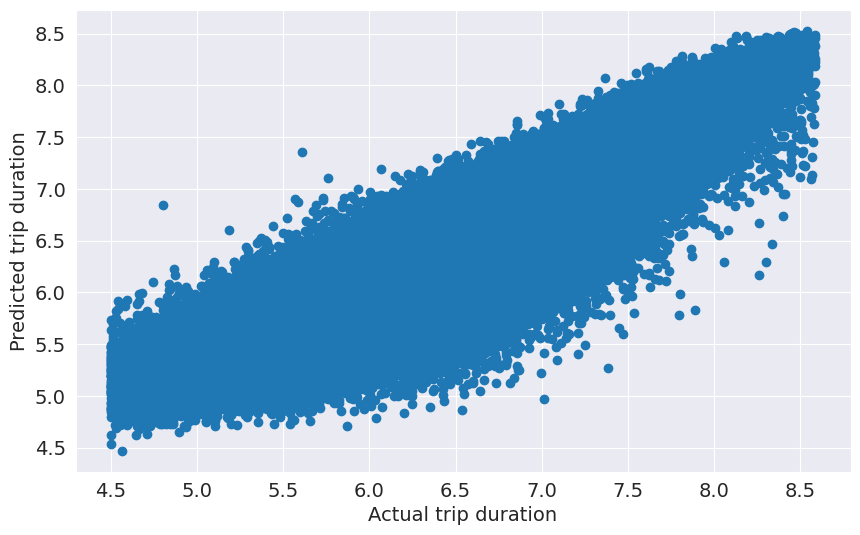

In [ ]:
#Scatter plot vs Actual & Predicted trip duration Values
plt.scatter((y_test), (y_pred_xg))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

Text(0, 0.5, 'residuals')

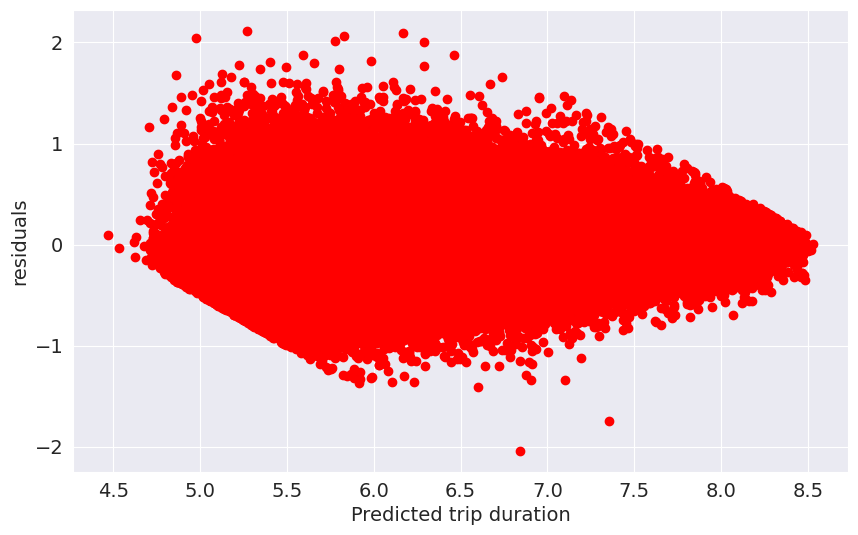

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_xg),(y_test)-(y_pred_xg),c='r')
plt.xlabel('Predicted trip duration')
plt.ylabel('residuals')

## **Results**

In [ ]:

#creating test results in table format
from prettytable import PrettyTable

test = PrettyTable(['SL NO', 'MODEL_NAME', 'Test MSE', 'Test MAE', 'Test RMSE', 'Test R^2', 'Test Adjusted R^2'])
test.add_row(['1', 'Linear Regression', '0.17', '0.32', '0.41', '0.65', '0.65'])
test.add_row(['2', 'Random Forest Regressor', '0.13', '0.29', '0.36', '0.72', '0.72'])
test.add_row(['3', 'XGBRegressor', '0.08', '0.22', '0.28', '0.83', '0.83'])

print(test)


+-------+-------------------------+----------+----------+-----------+----------+-------------------+
| SL NO |        MODEL_NAME       | Test MSE | Test MAE | Test RMSE | Test R^2 | Test Adjusted R^2 |
+-------+-------------------------+----------+----------+-----------+----------+-------------------+
|   1   |    Linear Regression    |   0.17   |   0.32   |    0.41   |   0.65   |        0.65       |
|   2   | Random Forest Regressor |   0.13   |   0.29   |    0.36   |   0.72   |        0.72       |
|   3   |       XGBRegressor      |   0.08   |   0.22   |    0.28   |   0.83   |        0.83       |
+-------+-------------------------+----------+----------+-----------+----------+-------------------+


# **Conclusion**

During our analysis, Firstly did data preprocessing by creating few columns . I cleaned the data and removed outliers. Then conducted an exploratory data analysis (EDA) on all the features in our dataset.  I have done Monovariate and Bivariate analysis on these variables . I also studied the numerical variables, calculated their correlations, and the their relationships with the dependent variable. I also handled multicollinearity issue using VIF. I also done OneHotencoding by adding dummy columns .



I employed 3 machine learning algorithms including Linear Regression, Random Forest and XG Boosting . I also performed hyperparameter tuning to enhance the performance of our models.

**Some Facts:**

* Our base model (Linear Regression) gave us a r2_score of 0.65 in  test data and keep this model accuracy in reference to compare other model.

* We got the best model accuracy in Xgboost model,r2 score of  0.83 in test data..The RMSE score of Xgboost model is 0.28

* Our second best model is RandomForest Regressor with a r2 score of 0.72  in test data. The RMSE score of random forest is 0.36

* If we dont use proper hypertunning parameter for Random Forest , it gives overfitting issues and takes to much time to run.(Practical observation)

* As far as data is concern , we can see that there is rise in trip duration and number of rides at the time of evening , this looks like some natural pattern because of the trafic issues .

* Also there are more pickup numbers durig 4-6 pm in the evening. This is due to Closing office hours may be.

* March is the month where most of the Taxi rides happen this cound be due to all salaries are created due to budget end month or  else it can be due to vacations as well

* Taxi trips are lowest on Mondays and comparatively low at sSundays as well.
On Sundays people prefer to stay at home other than going outside in the traffic.





